<a href="https://colab.research.google.com/github/PaulaBergamasco/BCI/blob/main/Mentor%C3%ADa_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas._libs.tslibs.timestamps import Timestamp
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
from pylab import * 
import numpy as np
from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
from scipy import signal as sgn
import seaborn
from matplotlib.pyplot import figure
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/df_curado.csv')

Mounted at /content/df_curado.csv


In [3]:
df= pd.read_csv('/content/df_curado.csv/MyDrive/Mentoria_entrega_2/Dataset_enregable2.csv')

In [4]:
df.head()

,ch0,ch1,ch2,ch3,label,time,sub_label,subject,session,sub_sess
0,-1.86,-12.95,-9.18,-41.36,99,0.000,99-0,AA,0,AA-0
1,10.77,3.47,6.87,-15.13,99,0.005,99-0,AA,0,AA-0
2,87.61,65.61,88.78,32.23,99,0.010,99-0,AA,0,AA-0
3,83.04,50.88,77.30,4.49,99,0.015,99-0,AA,0,AA-0
4,8.07,-20.55,-6.68,-38.09,99,0.020,99-0,AA,0,AA-0


#DOMINIO DE FRECUENCIA

In [5]:
dfAA= df[(df['sub_sess'] == 'AA-2')]

In [6]:
s1= dfAA[(dfAA['label'] == 1)]

In [7]:
s2= dfAA[(dfAA['label'] == 2)]

In [8]:
s99= dfAA[(dfAA['label'] == 99)]

#Nivel Segmento/Estado

Para este análisis se escogió el canal 2 del paciente AA sesión 2.

##Frecuencia de Nyquist

La fórmula para la frecuencia de Nyquist es:

*    fNQ= 1/2*dt ó f0/2

Donde f0 es la fecuencia de muestreo.

La frecuencia de Nyquist es la frecuencia más alta que posiblemente podamos esperar observar en los datos.

In [9]:
fNQ= 1 / (2 * 0.005)
fNQ

100.0

En nuestro estudio la frecuencia de Nyquist, es decir la frecuencia máxima que pudo ser registrada es 100Hz

##Densidad espectral de potencia

In [10]:
#función que hace las transformadas 
def transformadas(signal, dt):
    N = signal.shape[0]
    T = N*dt
    
    fft = np.fft.rfft(signal)
    Sxx = ((2*dt**2)/T)*fft*fft.conj()
    

In [11]:
#función que plotea las transformadas 
def plot_spectral(signal, dt, freq_lim=None, amp_lim=None, color='blue'):
    N = signal.shape[0]
    T = N*dt
    
    fft = np.fft.rfft(signal)
    Sxx = ((2*dt**2)/T)*fft*fft.conj()
    
    freqs = np.fft.rfftfreq(n=N, d=dt)

    fig, axs = plt.subplots(1,1)
    fig.set_figwidth(20,4)
    axs.plot(freqs, Sxx, color=color)
    axs.set_ylabel("Spectral Density [$uV^2$/Hz]")
    axs.set_xlabel("Freq [Hz]")
    axs.set_title("Espectro de potencia")
    axs.set_xlim(freq_lim)
    axs.set_ylim(amp_lim)
    plt.grid('on')

Se calcula la densidad espectral de potencia, o espectro, para poder evaluar la actividad rítmica en los datos del EEG. Esta densidad espectral de potencia es calculada utilizando la transformada de Fourier, ya que el espectro de los datos es la magnitud al cuadrado de la transformada de Fourier. El espectro indica la amplitud de la actividad rítmica (potencia) en función de la frecuencia.

In [12]:
s1t= s1['ch2']
ts1= s1['time']
dts1= 0.005
Ns1= len(s1t)
Ts1= Ns1 * dts1    

In [13]:
s2t= s2['ch2']
ts2= s2['time']
dts2= 0.005
Ns2= len(s2t)
Ts2= Ns2 * dts2 

In [14]:
s99t= s99['ch2']
ts99= s99['time']
dts99= 0.005
Ns99= len(s99t)
Ts99= Ns99 * dts99 

####Inspección visual de los datos  (dominio del tiempo)

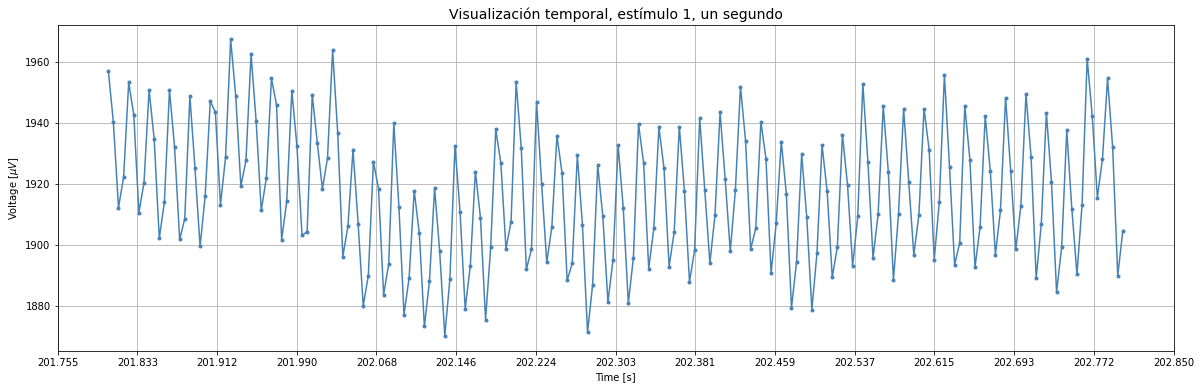

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(ts1[0:200], s1t[0:200], '.-', color='steelblue') 
ax.xaxis.set_major_locator(ticker.LinearLocator(15))
plt.title(f'Visualización temporal, estímulo 1, un segundo', fontsize=14)
plt.grid('on')
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.show()

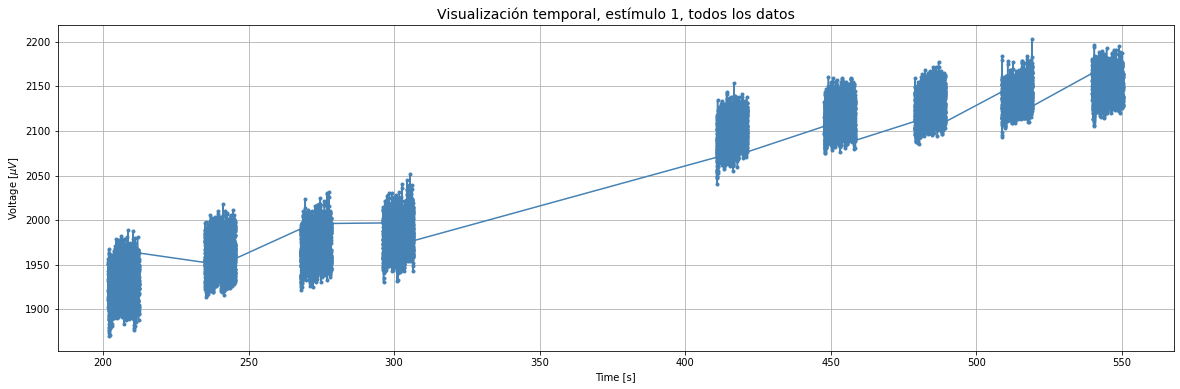

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(ts1, s1t, '.-', color='steelblue') 
plt.title(f'Visualización temporal, estímulo 1, todos los datos', fontsize=14)
plt.grid('on')
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.show()

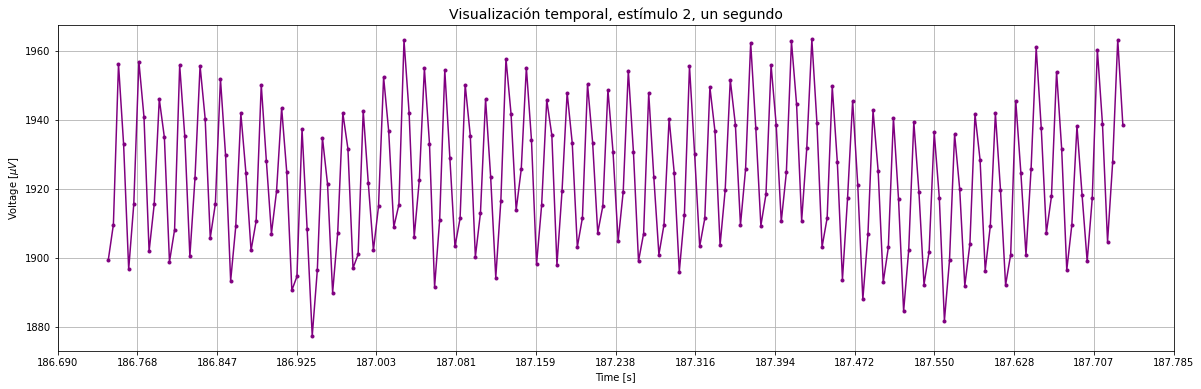

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(ts2[0:200], s2t[0:200], '.-', color='purple') 
ax.xaxis.set_major_locator(ticker.LinearLocator(15))
plt.title(f'Visualización temporal, estímulo 2, un segundo', fontsize=14)
plt.grid('on')
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.show()

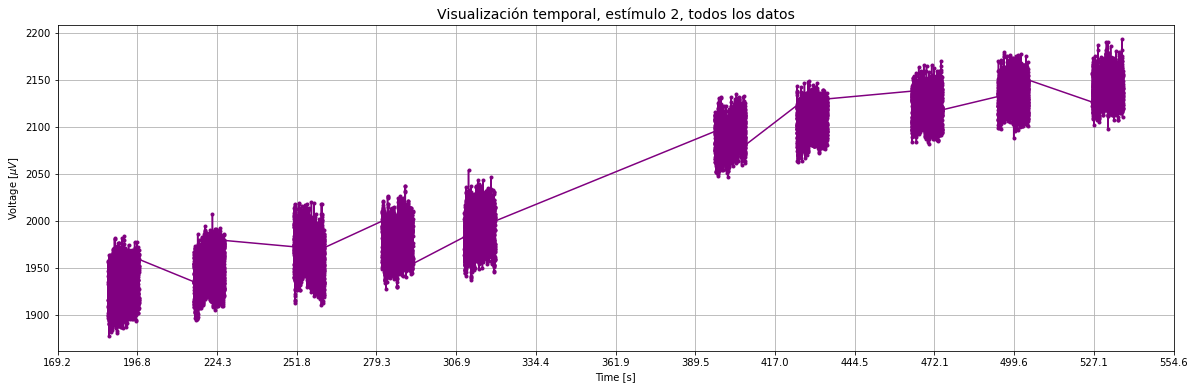

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(ts2, s2t, '.-', color='purple') 
ax.xaxis.set_major_locator(ticker.LinearLocator(15))
plt.title(f'Visualización temporal, estímulo 2, todos los datos', fontsize=14)
plt.grid('on')
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.show()

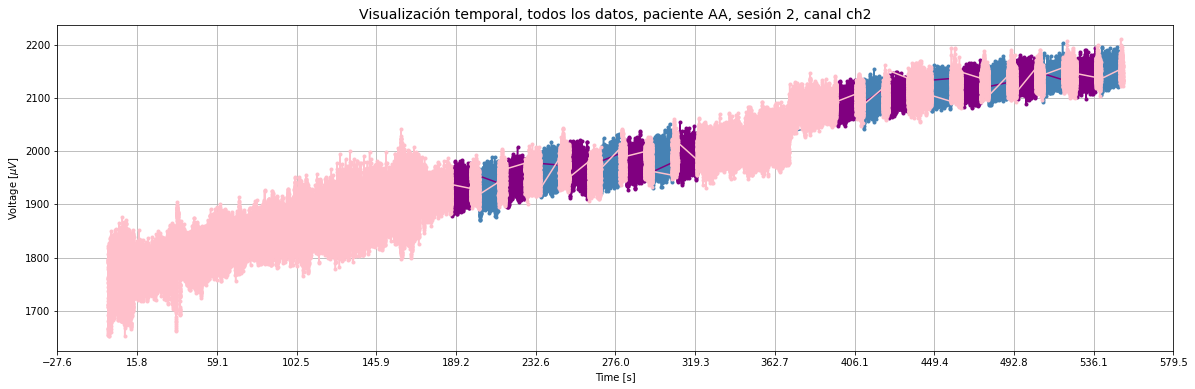

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(ts1, s1t, '.-', color='steelblue') 
ax.plot(ts2, s2t, '.-', color='purple') 
ax.plot(ts99, s99t, '.-', color='pink') 
ax.xaxis.set_major_locator(ticker.LinearLocator(15))
plt.title(f'Visualización temporal, todos los datos, paciente AA, sesión 2, canal ch2', fontsize=14)
plt.grid('on')
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.show()

####Transformada de fourier y espectro de potencia


In [20]:
s1tf= np.fft.rfft(s1t)

In [21]:
s1tfx = ((2*dts1**2)/Ts1)*s1tf*s1tf.conj()
s1tfx = s1tfx.real

In [22]:
s1tfx

array([7.98005207e+08, 5.05508891e+05, 2.78098367e+04, ...,
       9.99063639e-01, 1.25178339e+02, 2.49941118e+01])

No handles with labels found to put in legend.


(0.0, 200.0)

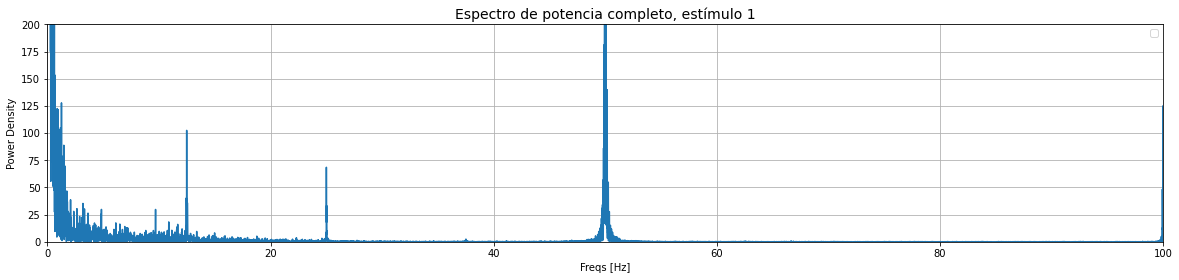

In [23]:
freqs1 = np.fft.rfftfreq(n=ts1.shape[0], d=dts1)
fig = plt.figure(figsize=(20, 4))
plot(freqs1, s1tfx)
plt.legend()
plt.title(f'Espectro de potencia completo, estímulo 1', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(0,100)
ylim(0,200)

No handles with labels found to put in legend.


(0.0, 200.0)

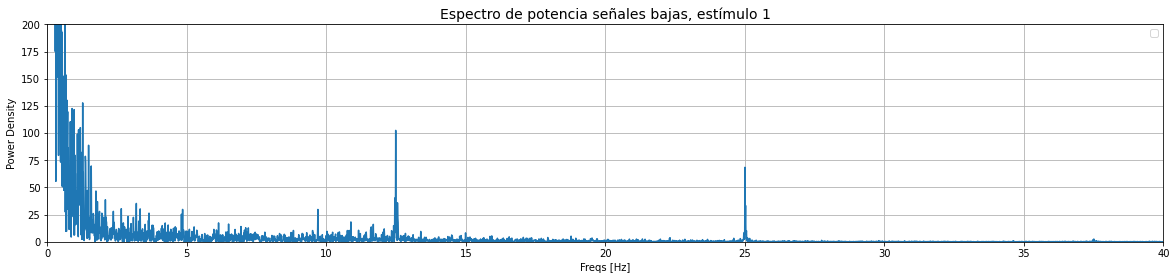

In [24]:
freqs1 = np.fft.rfftfreq(n=ts1.shape[0], d=dts1)
fig = plt.figure(figsize=(20, 4))
plot(freqs1, s1tfx)
plt.legend()
plt.title(f'Espectro de potencia señales bajas, estímulo 1', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(0,40)
ylim(0,200)

In [25]:
s2tf= np.fft.rfft(s2t)

In [26]:
s2tfx = ((2*dts2**2)/Ts2)*s2tf*s2tf.conj()
s2tfx = s2tfx.real

(0.0, 200.0)

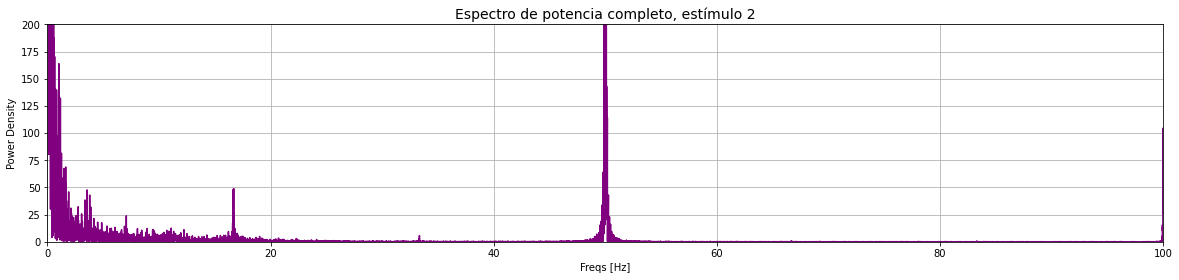

In [27]:
freqs2 = np.fft.rfftfreq(n=ts2.shape[0], d=dts2)
fig = plt.figure(figsize=(20, 4))
plot(freqs2, s2tfx, color='Purple')
plt.title(f'Espectro de potencia completo, estímulo 2', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(0,100)
ylim(0,200)

(0.0, 200.0)

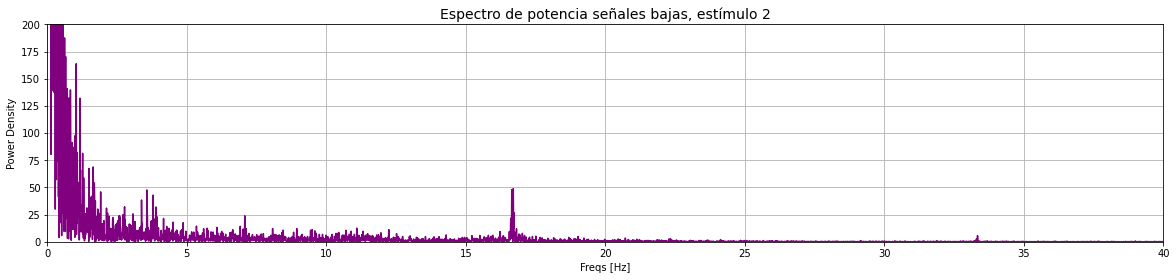

In [28]:
freqs2 = np.fft.rfftfreq(n=ts2.shape[0], d=dts2)
fig = plt.figure(figsize=(20, 4))
plot(freqs2, s2tfx, color='Purple')
plt.title(f'Espectro de potencia señales bajas, estímulo 2', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(0,40)
ylim(0,200)

Se puede observar en los gráficos representados que hay una actividad rítmica a la frecuencia de 50Hz, para ambos casos (estímulo 1 y estímulo 2), que es generado por la interferencia electromagnética, que exhibe la mayor potencia. Pero cuando se analiza en más detalle las frecuencias mas bajas, donde se encuentran nuestras frecuencias de interés, se puede observar que existe actividad rítmica a la frecuencia de 12,5Hz en el caso del estímulo 1 y a la frecuencia de 16,5Hz en el caso del estímulo dos, y para ambos casos también se llega a observar los armónicos de ambas frecuencias, 25 Hz y 33 Hz, respectivamente, aunque con menor potencia.

In [29]:
s99tf= np.fft.rfft(s99t)

In [30]:
s99tfx = ((2*dts99**2)/Ts99)*s99tf*s99tf.conj()
s99tfx = s99tfx.real

(0.0, 200.0)

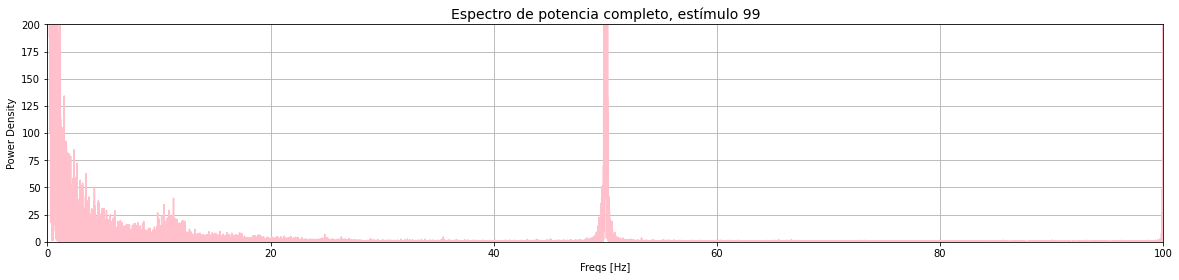

In [31]:
freqs99 = np.fft.rfftfreq(n=ts99.shape[0], d=dts99)
fig = plt.figure(figsize=(20, 4))
plot(freqs99, s99tfx, color='pink')
plt.title(f'Espectro de potencia completo, estímulo 99', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(0,100)
ylim(0,200)

(0.0, 200.0)

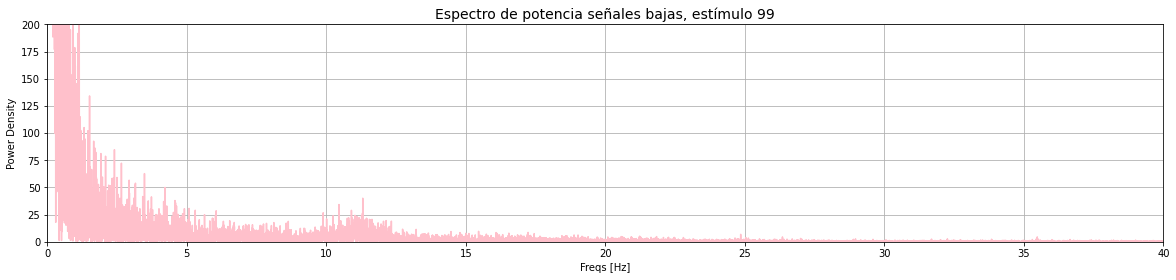

In [32]:
freqs99 = np.fft.rfftfreq(n=ts99.shape[0], d=dts99)
fig = plt.figure(figsize=(20, 4))
plot(freqs99, s99tfx, color='pink')
plt.title(f'Espectro de potencia señales bajas, estímulo 99', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(0,40)
ylim(0,200)

Se puede observar en los gráficos representados que permanece la actividad rítmica a la frecuencia de 50Hz, para el caso en el que el paciente no esta recibiendo ningún estímulo. Pero cuando se analiza en más detalle las frecuencias mas bajas, no se observa ninguna frecuencia predominante, estando ausentes los picos observados en el caso de los otros estados.

(0.0, 120.0)

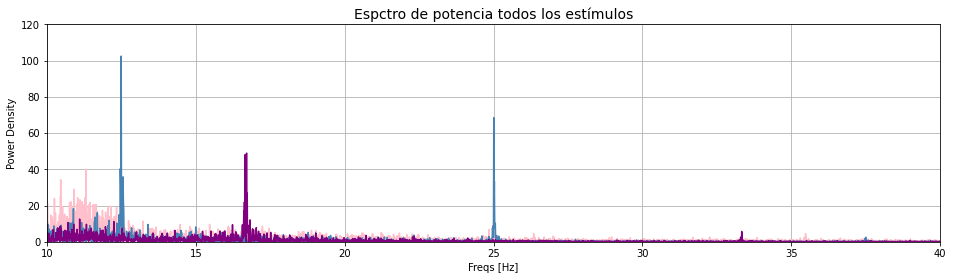

In [33]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(freqs99, s99tfx, color='pink')
ax.plot(freqs1, s1tfx, color='steelblue')
ax.plot(freqs2, s2tfx, color='purple')
plt.title(f'Espctro de potencia todos los estímulos', fontsize=14)
plt.grid('on')
xlabel("Freqs [Hz]")
ylabel("Power Density")
xlim(10,40)
ylim(0,120)

#### Espectro de potencia en decibelios

Text(0, 0.5, 'Power [dB]')

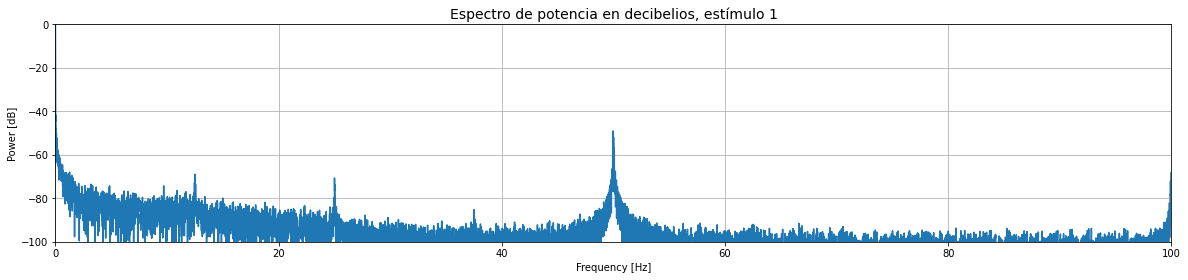

In [34]:
fig = plt.figure(figsize=(20, 4))
plot(freqs1, 10 * log10(s1tfx / max(s1tfx)))  
xlim([0, 100])                           
ylim([-100, 0])   
plt.title(f'Espectro de potencia en decibelios, estímulo 1', fontsize=14)
plt.grid('on')                     
xlabel('Frequency [Hz]')                 
ylabel('Power [dB]')

Text(0, 0.5, 'Power [dB]')

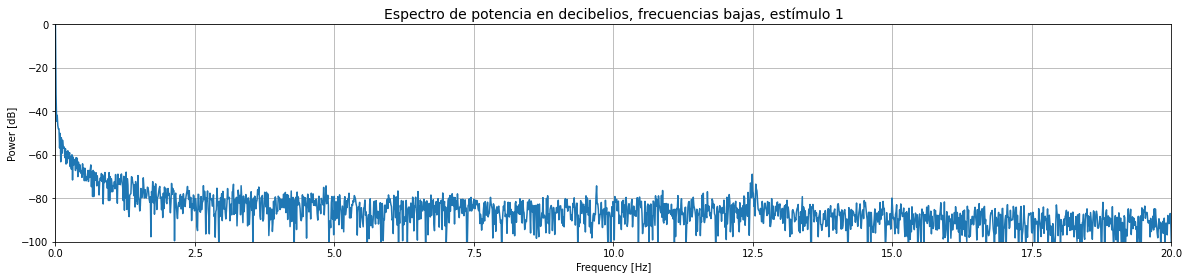

In [35]:
fig = plt.figure(figsize=(20, 4))
plot(freqs1, 10 * log10(s1tfx / max(s1tfx)))  
xlim([0, 20])                           
ylim([-100, 0])   
plt.title(f'Espectro de potencia en decibelios, frecuencias bajas, estímulo 1', fontsize=14)
plt.grid('on')                         
xlabel('Frequency [Hz]')                 
ylabel('Power [dB]')

Text(0, 0.5, 'Power [dB]')

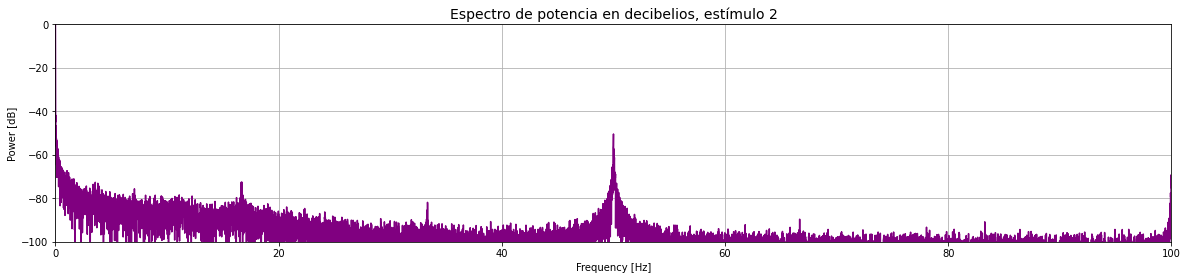

In [36]:
fig = plt.figure(figsize=(20, 4))
plot(freqs2, 10 * log10(s2tfx / max(s2tfx)), color= 'Purple')  
xlim([0, 100])                           
ylim([-100, 0]) 
plt.title(f'Espectro de potencia en decibelios, estímulo 2', fontsize=14)
plt.grid('on')                           
xlabel('Frequency [Hz]')                 
ylabel('Power [dB]')

Text(0, 0.5, 'Power [dB]')

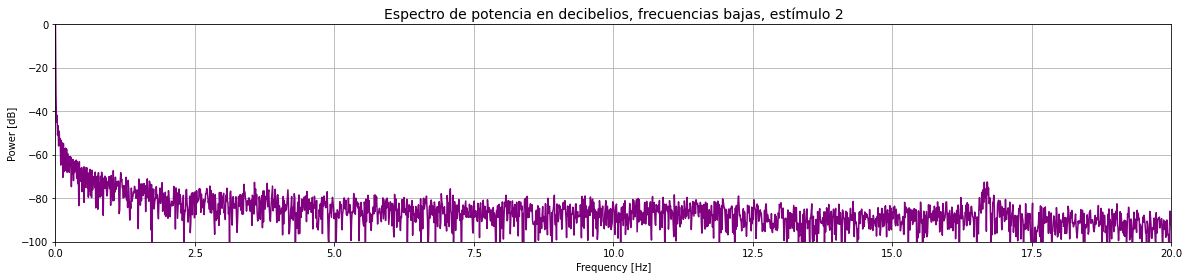

In [37]:
fig = plt.figure(figsize=(20, 4))
plot(freqs2, 10 * log10(s2tfx / max(s2tfx)), color= 'Purple')  
xlim([0, 20])                           
ylim([-100, 0])        
plt.title(f'Espectro de potencia en decibelios, frecuencias bajas, estímulo 2', fontsize=14)
plt.grid('on')                    
xlabel('Frequency [Hz]')                 
ylabel('Power [dB]')

Text(0, 0.5, 'Power [dB]')

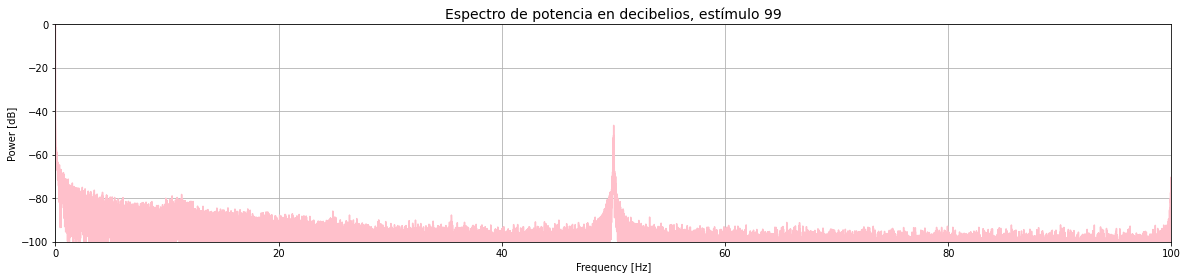

In [38]:
fig = plt.figure(figsize=(20, 4))
plot(freqs99, 10 * log10(s99tfx / max(s99tfx)), color= 'pink')  
xlim([0, 100])                           
ylim([-100, 0])       
plt.title(f'Espectro de potencia en decibelios, estímulo 99', fontsize=14)
plt.grid('on')                 
xlabel('Frequency [Hz]')                 
ylabel('Power [dB]')

Text(0, 0.5, 'Power [dB]')

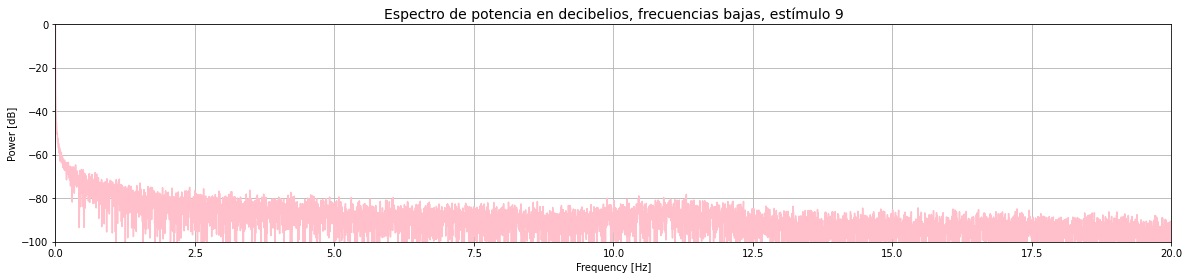

In [39]:
fig = plt.figure(figsize=(20, 4))
plot(freqs99, 10 * log10(s99tfx / max(s99tfx)), color= 'pink')  
xlim([0, 20])                           
ylim([-100, 0])    
plt.title(f'Espectro de potencia en decibelios, frecuencias bajas, estímulo 9', fontsize=14)
plt.grid('on')                       
xlabel('Frequency [Hz]')                 
ylabel('Power [dB]')

Una técnica para enfatizar los ritmos de menor amplitud ocultos por oscilaciones de gran amplitud es cambiar la escala del espectro a decibelios, el decibel es una escala logarítmica. En estos casos el ritmo de 50 Hz sigue siendo predominante al igual que en los casos previos, y se amplían las magnitudes de señales bajas, pero agregan ruido a las señales de interés, por lo que el gráfico de potencia en decibelios brinda información relevante al análisis, si no que lo obstaculiza, ya que atenúa las señales de interés, y resalta las señales irrelevantes.

##Frecuencias de mayor prevalencia entre los estados

In [40]:
f1= pd.Series(freqs1, s1tfx).sort_index(ascending=False).round(2)
f1[(f1 > 10) & (f1 < 40)].head(2)

102.486055    12.49
68.529200     25.01
dtype: float64

In [41]:
f2= pd.Series(freqs2, s2tfx).sort_index(ascending=False).round(2)
f2[(f2 > 10) & (f2 < 40)].head(2)

48.921245    16.70
48.221734    16.69
dtype: float64

In [42]:
f99= pd.Series(freqs99, s99tfx).sort_index(ascending=False).round(2)
f99[(f99 > 10) & (f99 < 40)].head(2)

40.085558    11.31
34.248370    10.45
dtype: float64

Se pudo observar a través de los datos del espectro de frecuencias que existía una frecuencia con la mayor amplitud que correspondía a las cercanías al pico de 50 Hz, que se genera, como se mencionó previamente, por las interferencias electromagnéticas, y además se podía observar una frecuencia con gran amplitud correspondiente a la componente lineal a lo largo de la línea temporal que contienen los datos en las cercanías de 0Hz. Ignorando estas señales (señales inferiores a 10Hz, y superiores a 50Hz) se puede concluir que para el estado 1 las frecuencias con mayor amplitud son las frecuencias cercanas a 12,5 Hz, siguiéndole en magnitud la correspondiente a la armónica de la señal a 12,5 Hz, es decir 25 Hz; para el estado 2, se puede observar que las frecuencias con mayor amplitud corresponden a las frecuencias cercanas a 16,5 Hz, y si bien el armónico correspondiente a esta señal aparece, este lo hace con una magnitud muy baja, por lo que no figura dentro de las frecuencias con mayor presencia. Por otro lado se puede observar que para el estado 99, se observan picos con gran amplitud en las cercanías a 11 Hz, lo cual se debe a ruido en la señal.

##Eliminación de señales interferentes

In [43]:
sf = 200 
order = 4
sig_np1 = s1t.values.T
sig_np2 = s2t.values.T
sig_np99 = s99t.values.T

In [44]:
Q=30 
f_notch = 50

b, a = sgn.iirnotch(w0=f_notch, Q=Q, fs=sf)

In [45]:
sig_notch1 = sgn.filtfilt(b, a, sig_np1)
sig_notch2 = sgn.filtfilt(b, a, sig_np2)
sig_notch99 = sgn.filtfilt(b, a, sig_np99)

In [46]:
#Eliminación de valores de frecuencia inferiores a 10Hz y superiores 40Hz
f_nq = sf/2
f_low = 10
f_high = 40
order = 4

c, d = sgn.iirfilter(N=order, Wn=[f_low/f_nq, f_high/f_nq], btype="bandpass", ftype="butter")

In [47]:
s1f= sgn.filtfilt(c, d, sig_notch1)
s2f = sgn.filtfilt(c, d, sig_notch2)
s99f= sgn.filtfilt(c, d, sig_notch99)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


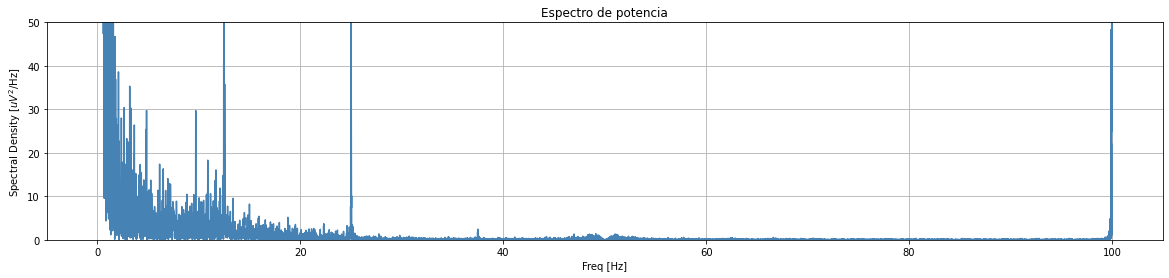

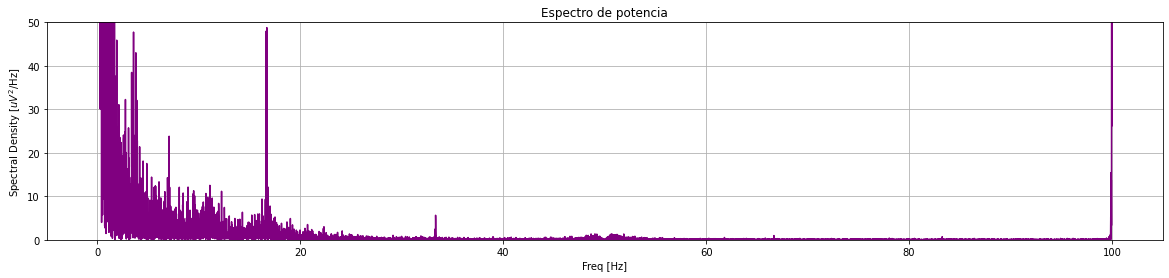

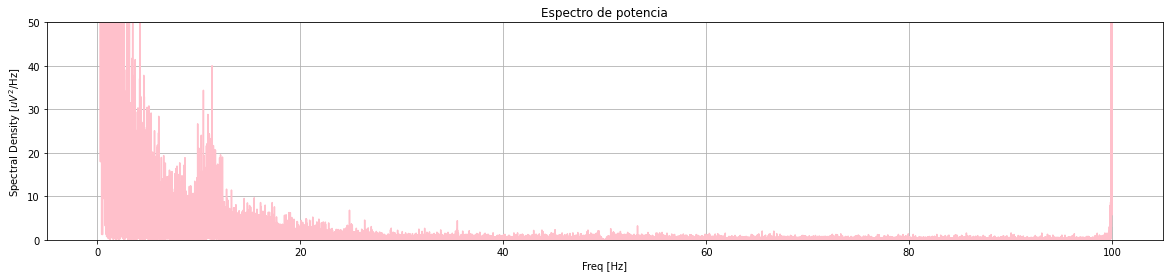

In [48]:
#gráficos de eliminación de el pico a 50Hz
plot_spectral(sig_notch1, dts1, freq_lim=None, amp_lim=(0, 50), color= 'steelblue') #estado 1
plot_spectral(sig_notch2, dts2, freq_lim=None, amp_lim=(0, 50), color= 'Purple') #estado 2
plot_spectral(sig_notch99, dts99, freq_lim=None, amp_lim=(0, 50), color= 'pink') #estado 99

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


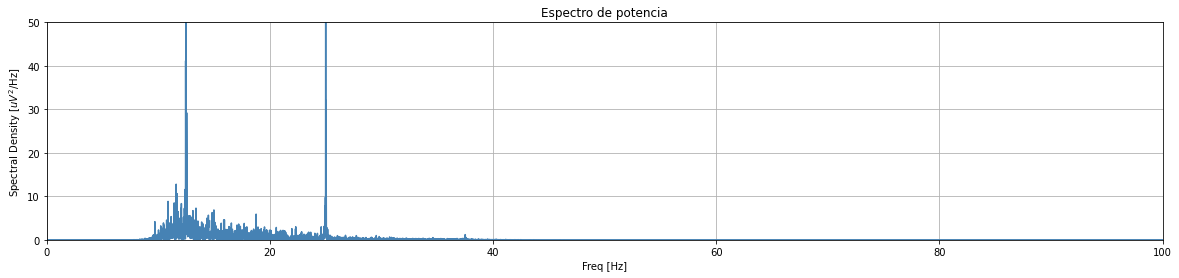

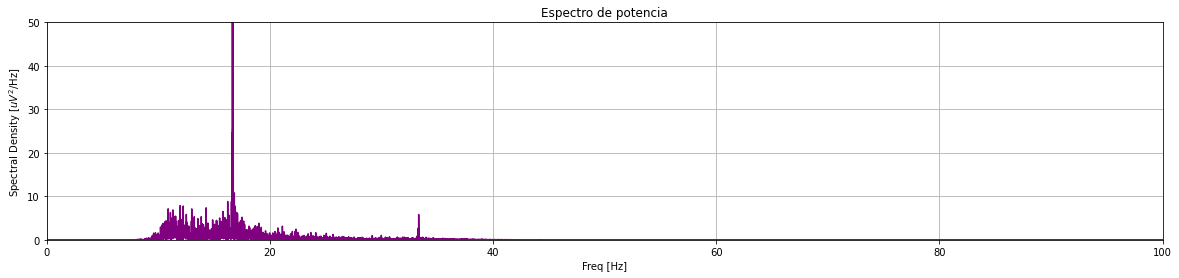

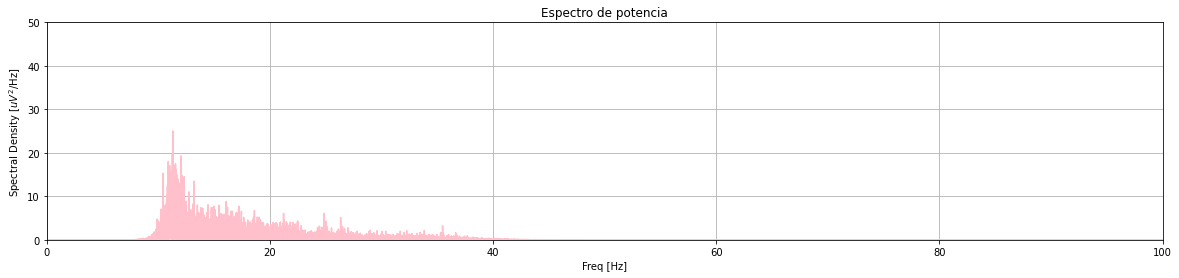

In [49]:
#gráficos de eliminación de señales superiores a 40 Hz, e inferiores a 10 Hz
plot_spectral(s1f, dts1, freq_lim=(0, 100), amp_lim=(0, 50), color= 'steelblue') #estado 1
plot_spectral(s2f, dts2, freq_lim=(0, 100), amp_lim=(0, 50), color= 'purple') #estado 2
plot_spectral(s99f, dts99, freq_lim=(0, 100), amp_lim=(0, 50), color= 'pink') #estado 99

Para filtrar las señales obtenidas se utilizó el criterio de descartar aquellas señales que se consideraron como interferentes, es decir que, en primer lugar se eliminó el pico de 50Hz, correspondiente a las señales provenientes de la interferencia electromagnética, y en segundo lugar otros picos interferentes o  ruido en la señal, y que se corresponden con la componente lineal observada en el estudio del dominio del tiempo, lo que involucra frecuencias inferiores a 10Hz, estos son los valores de señales que se deben descartar, ya que no son relevantes para el análisis y corresponden a señales que interferentes.

##Comparación con el dominio del tiempo

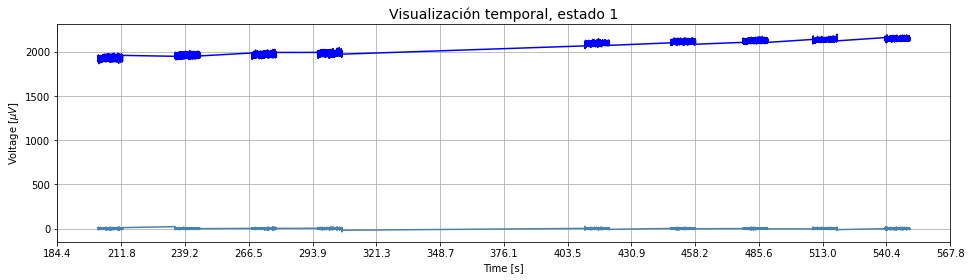

In [50]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(ts1, s1t, color= 'blue') 
ax.plot(ts1, s1f, color= 'steelblue') 
ax.xaxis.set_major_locator(ticker.LinearLocator(15))
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.title(f'Visualización temporal, estado 1', fontsize=14)
plt.grid('on')
plt.show()

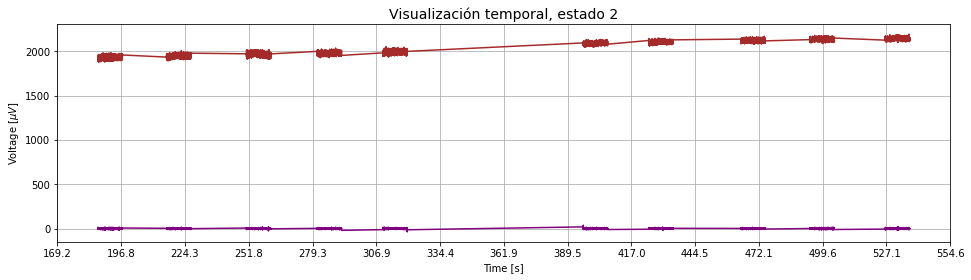

In [51]:
#gráfico estado 2 sin filtrar, y filtrado de la señal
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(ts2, s2t, color= 'brown') 
ax.plot(ts2, s2f, color= 'purple') 
ax.xaxis.set_major_locator(ticker.LinearLocator(15))
plt.title(f'Visualización temporal, estado 2', fontsize=14)
plt.grid('on')
plt.xlabel('Time [s]') 
plt.ylabel('Voltage [$\mu V$]')
plt.show()

Al comparar en el dominio del tiempo las señales con y sin filtrado de frecuencias indeseadas se llega a la conclusión de que al filtrar por frecuencias también se logra eliminar esa componente lineal que se visualizaba en la serie temporal, y se logra eliminar el ruido de la señal.

#Nivel Paciente - un canal

In [52]:
#función que hace las transformadas, y devuelve una serie
def transformadas_serie(signal, dt):
    N = signal.shape[0]
    T = N*dt
    
    fft = np.fft.rfft(signal)
    Sxx = ((2*dt**2)/T)*fft*fft.conj()
    Sxx= Sxx.real 

    freqs = np.fft.rfftfreq(n=N, d=dt)

    return pd.Series(freqs , Sxx)

Para este análisis se escogió el canal ch2 del paciente AA, sesión 2.

In [53]:
dfAA.sub_label.unique()

array(['99-0', '2-0', '99-1', '1-0', '99-2', '2-1', '99-3', '1-1', '99-4',
       '2-2', '99-5', '1-2', '99-6', '2-3', '99-7', '1-3', '99-8', '2-4',
       '99-9', '2-5', '99-10', '1-4', '99-11', '2-6', '99-12', '1-5',
       '99-13', '2-7', '99-14', '1-6', '99-15', '2-8', '99-16', '1-7',
       '99-17', '2-9', '99-18', '1-8', '99-19'], dtype=object)

In [54]:
sl1 = s1.sub_label.unique()

int_s1 = {}
for s in sl1:
    int_s1[s] = s1[(s1['sub_label'] == s)]['ch2']

In [55]:
sl2 = s2.sub_label.unique()

int_s2 = {}
for e in sl2:
    int_s2[e] = s2[(s2['sub_label'] == e)]['ch2']

In [56]:
sl99 = s99.sub_label.unique()

int_s99 = {}
for i in sl99:
    int_s99[i] = s99[(s99['sub_label'] == i)]['ch2']

####Frecuencia de mayor presencia

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


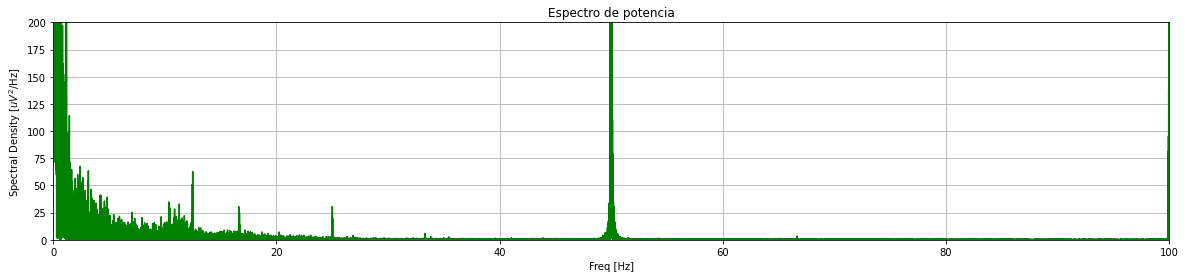

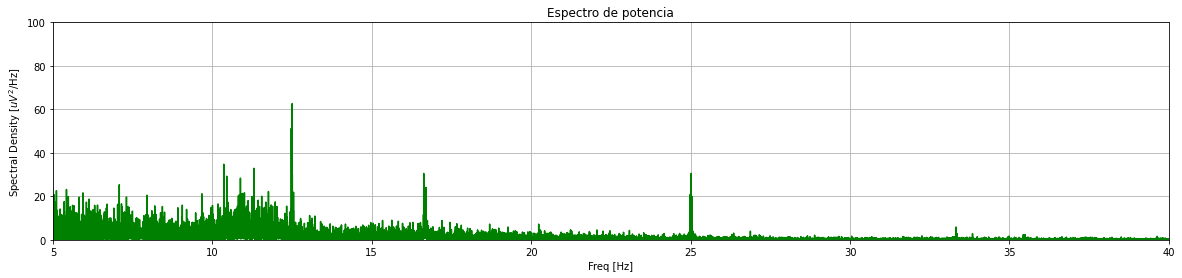

In [57]:
#gráfico de la señal completa del paciente AA
dfAAxt= transformadas(dfAA['ch2'], 0.005)
plot_spectral(dfAA['ch2'], 0.005, freq_lim=(0, 100), amp_lim=(0,200), color= 'green')
plot_spectral(dfAA['ch2'], 0.005, freq_lim=(5, 40), amp_lim=(0,100), color= 'green')

In [58]:
sig_np = dfAA['ch2'].values.T
sig_notch = sgn.filtfilt(b, a, sig_np)
dfAAf= sgn.filtfilt(c, d, sig_notch)

Para cada intevalo correspondiente al canal 2 del paciente AA y a cada estado, se aplicó la limpieza de las frecuencias interferentes y se lo graficó.



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

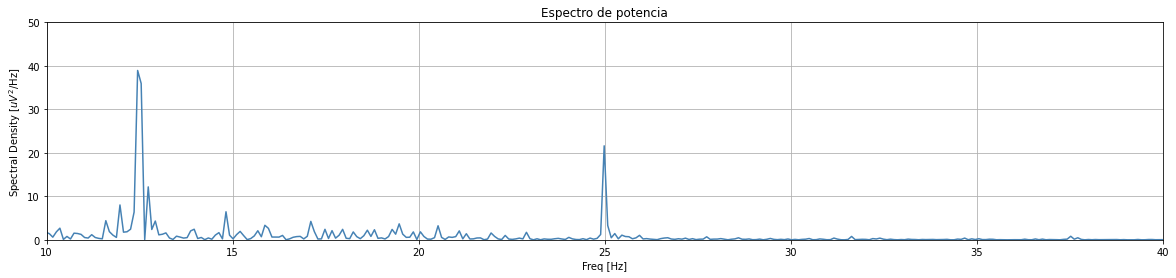

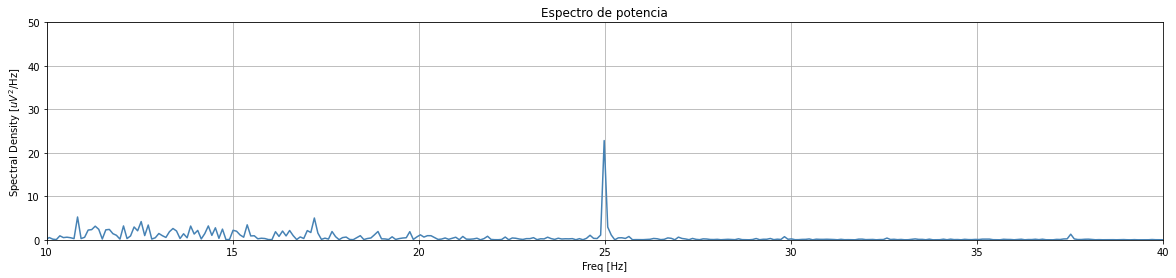

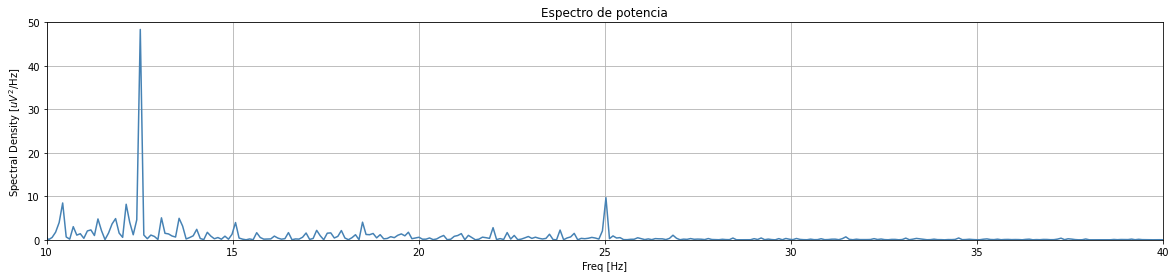

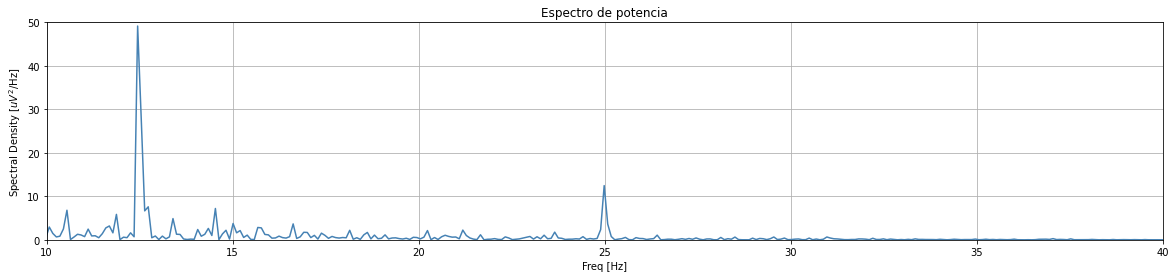

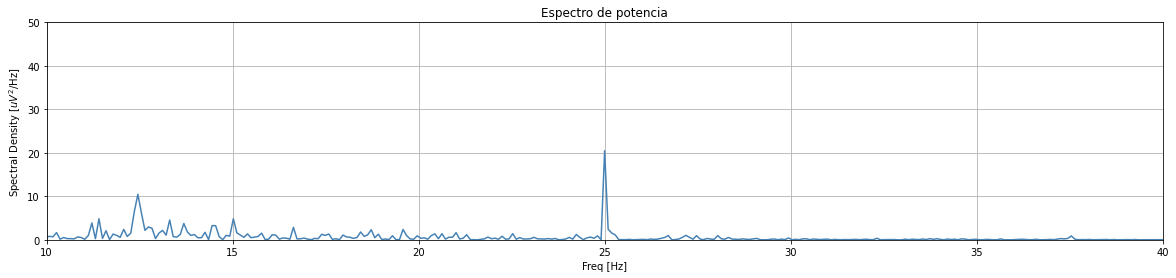

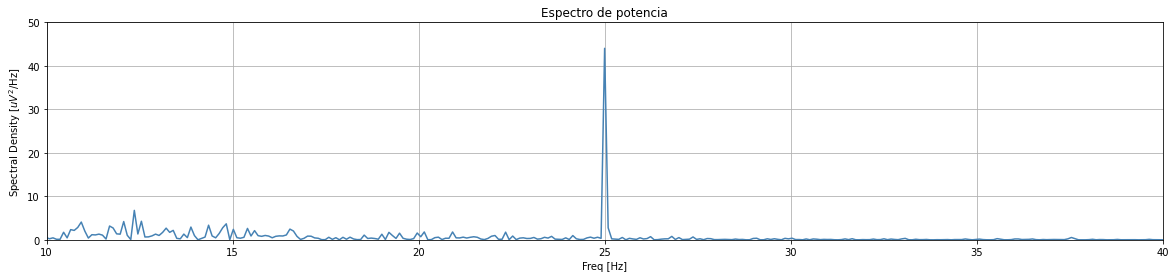

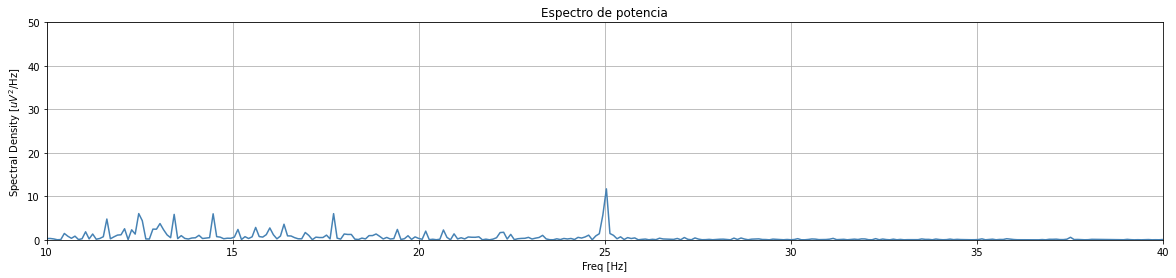

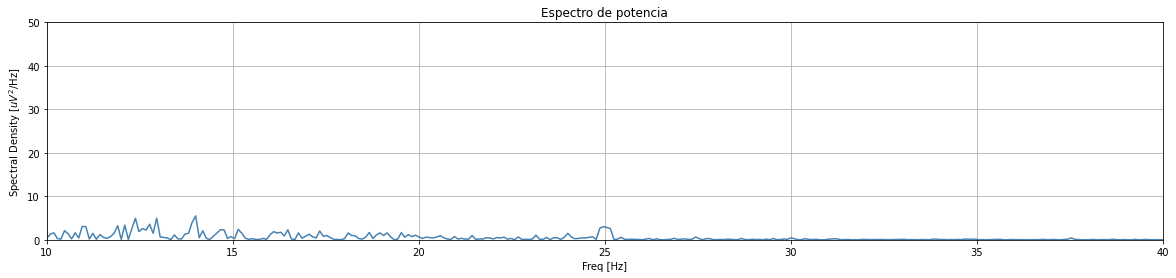

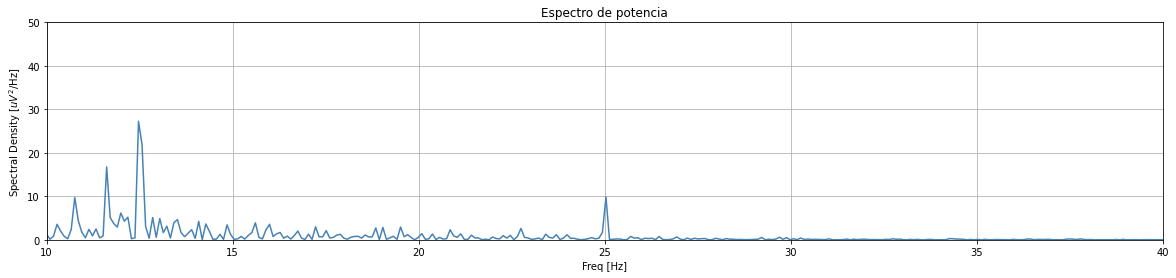

In [59]:
#gráficos intérvalos del estado 1
for intervalos in int_s1.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  transformadas(intervalos, 0.005)
  plot_spectral(intervalos, 0.005, freq_lim=(10, 40), amp_lim=(0,50), color= 'steelblue')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

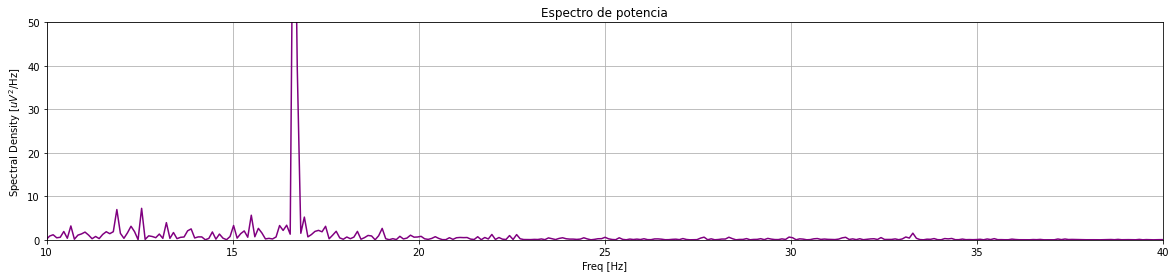

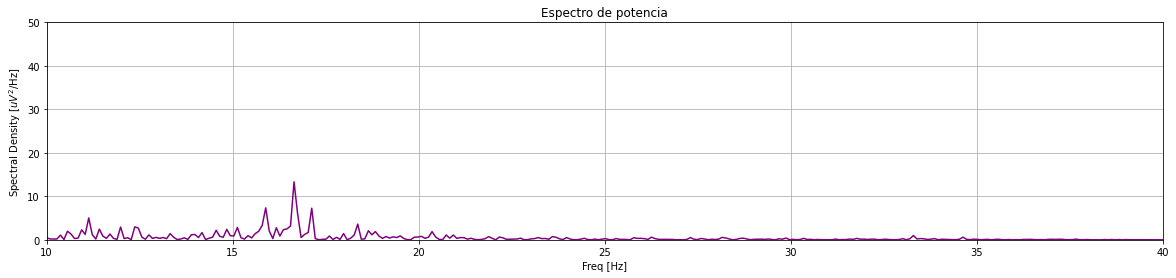

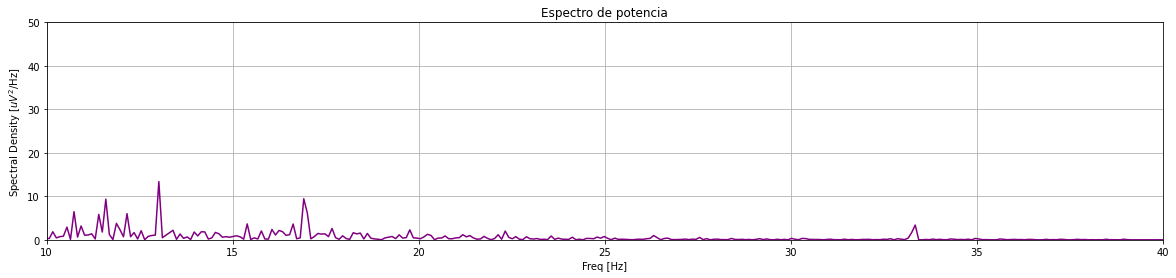

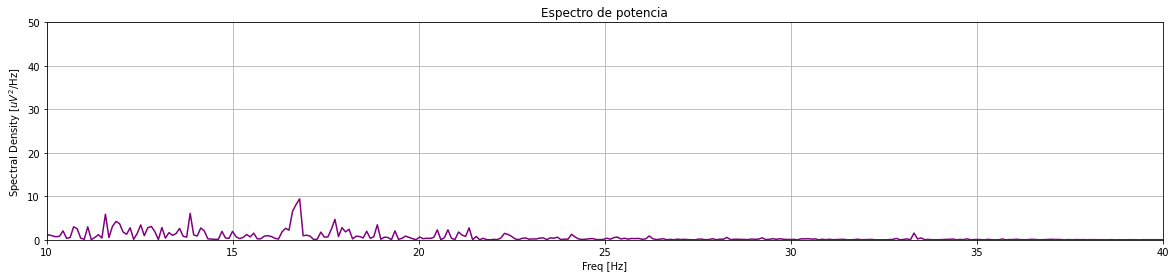

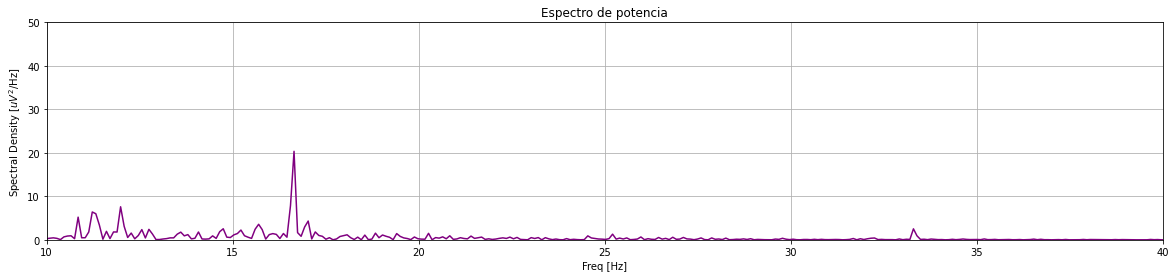

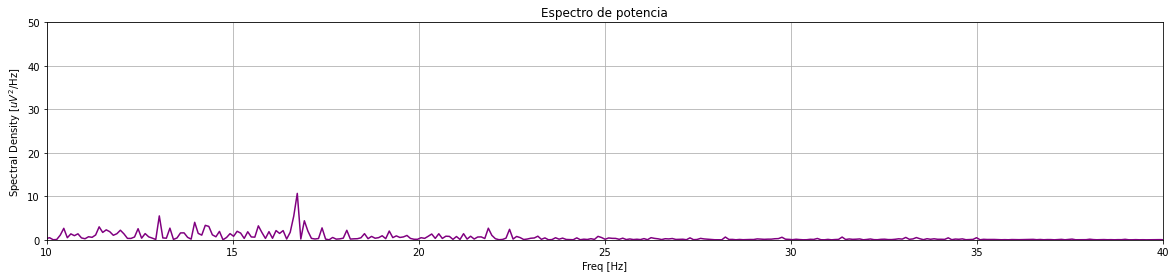

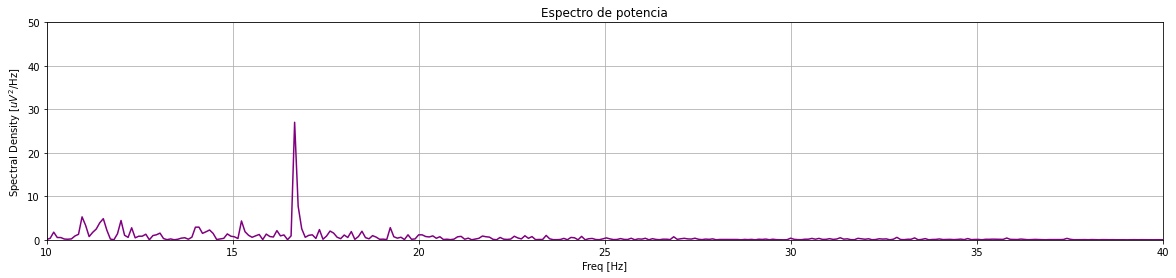

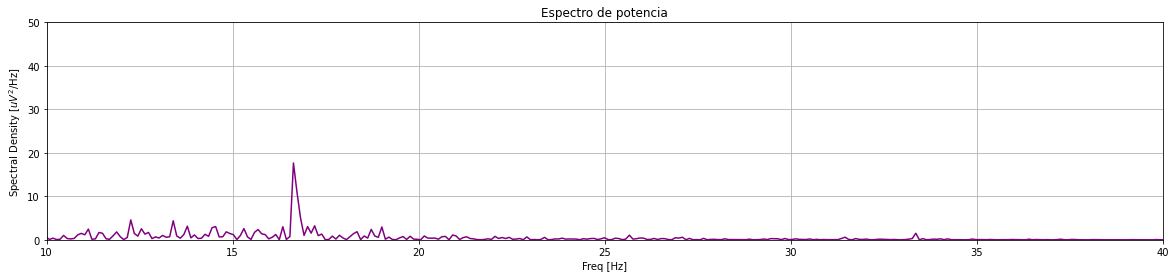

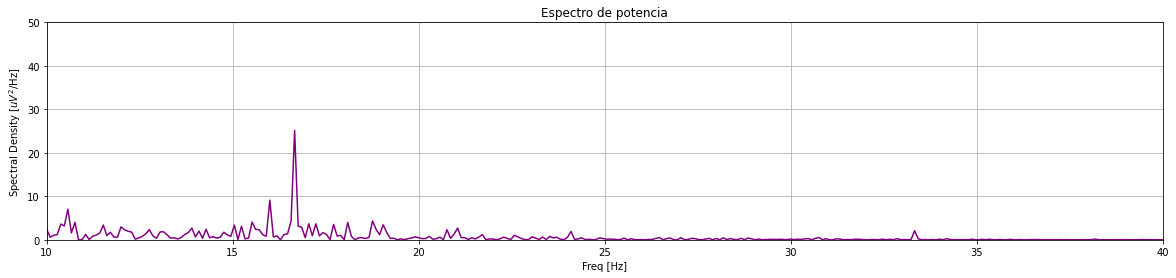

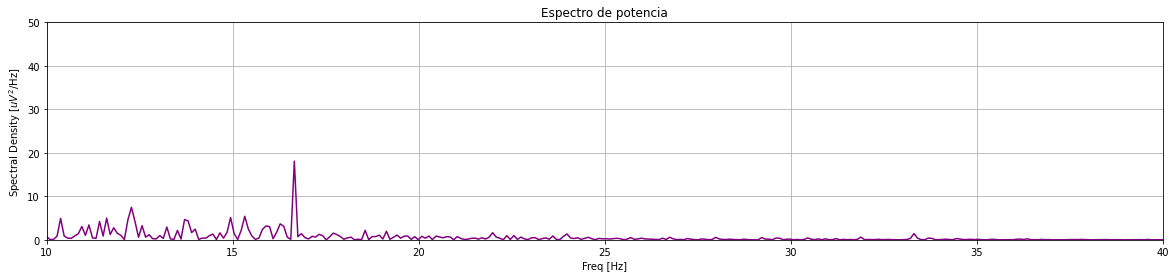

In [60]:
#gráficos intérvalos del estado 2
for intervalos in int_s2.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  transformadas(intervalos, 0.005)
  plot_spectral(intervalos, 0.005, freq_lim=(10, 40), amp_lim=(0,50), color= 'purple')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/

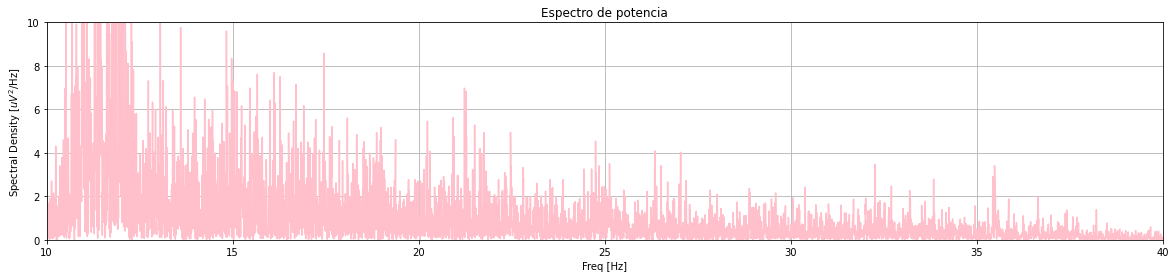

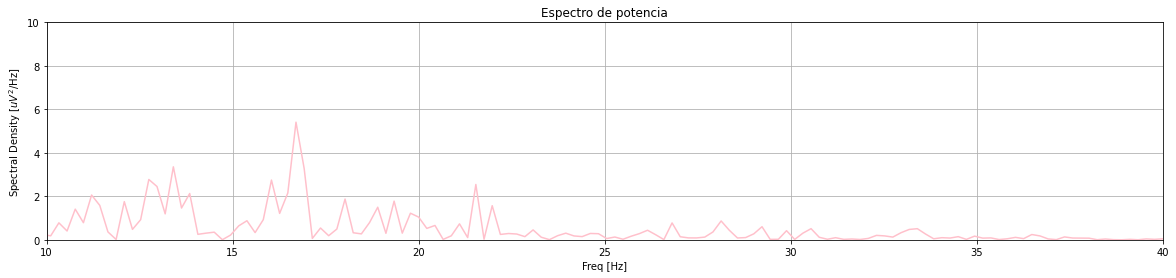

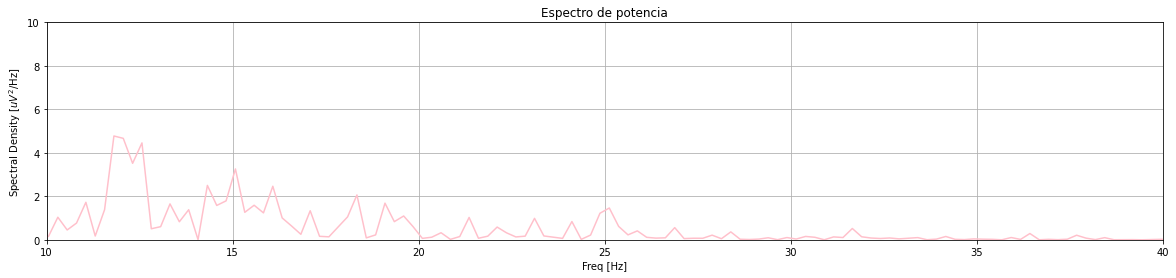

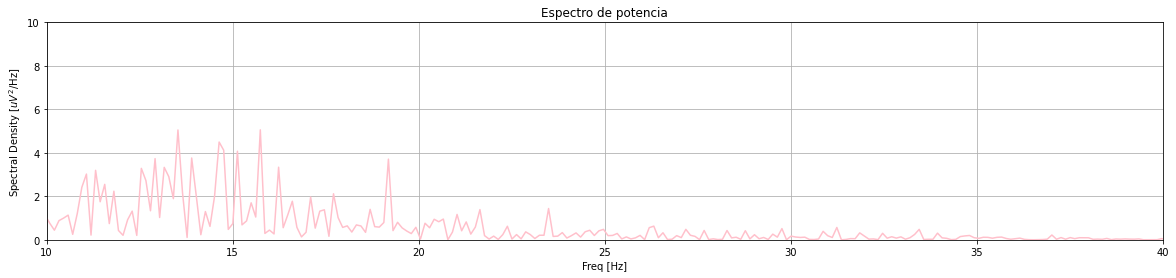

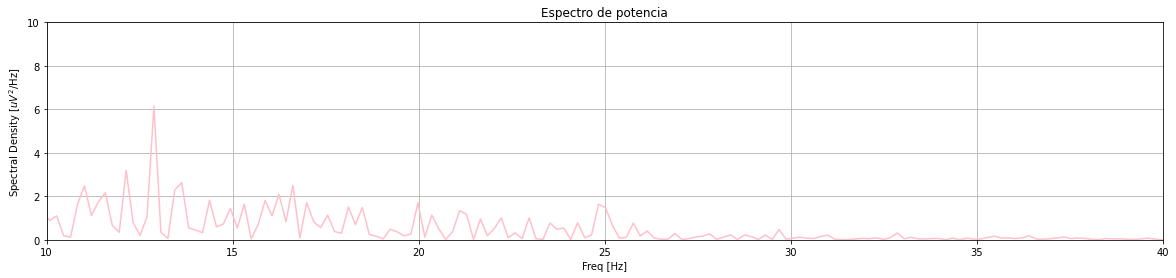

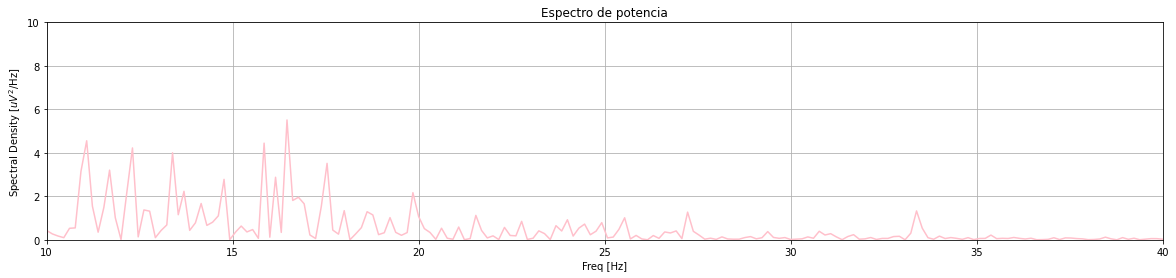

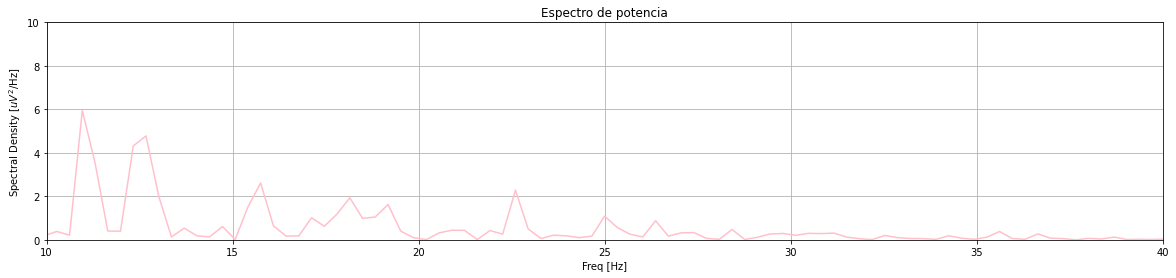

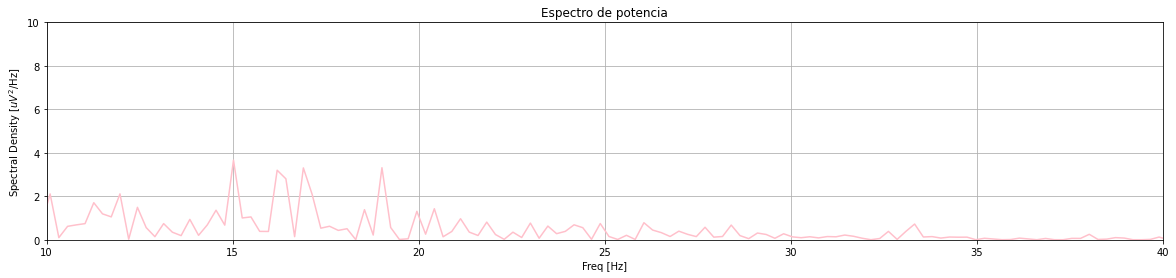

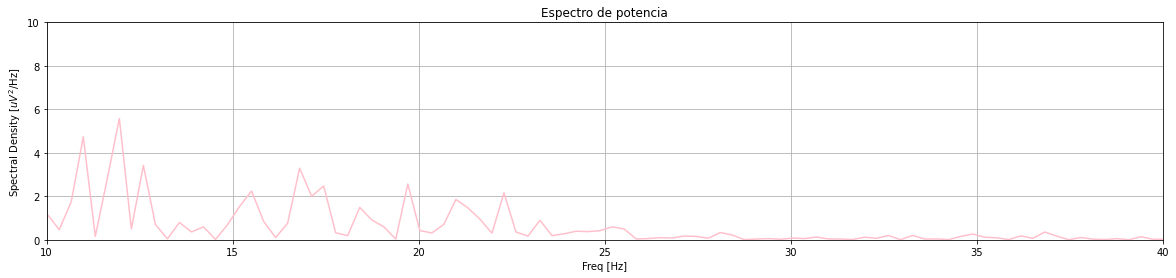

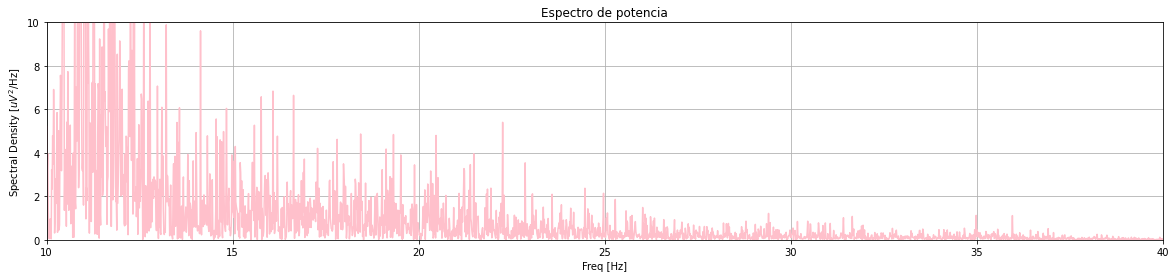

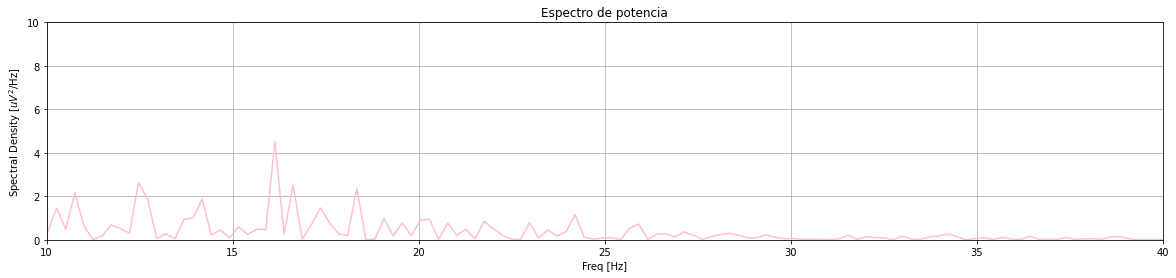

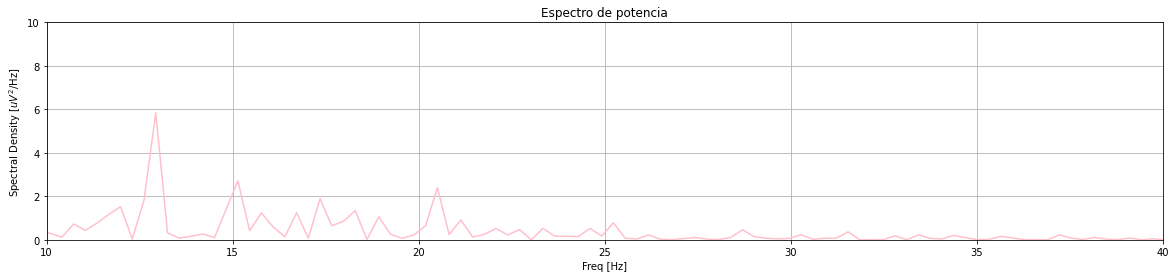

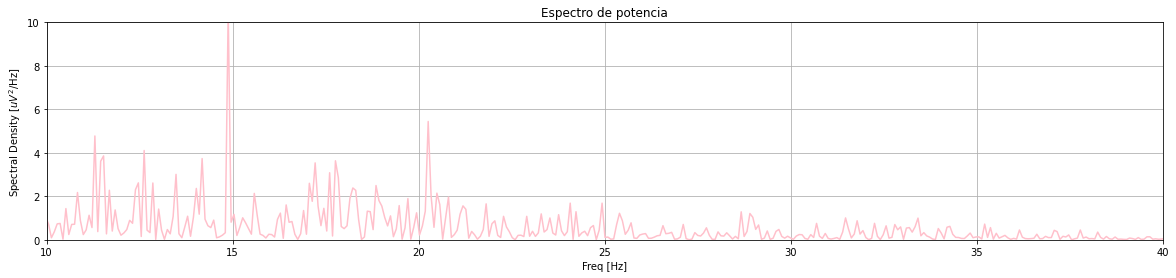

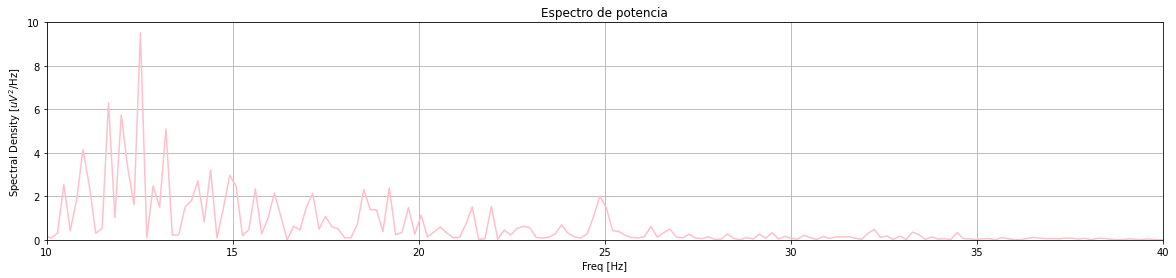

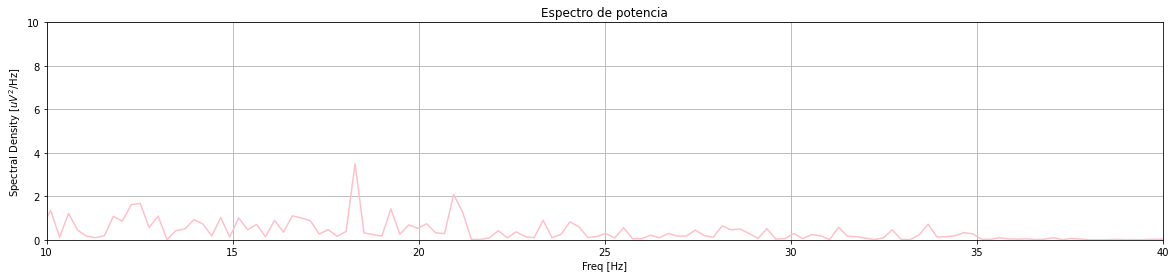

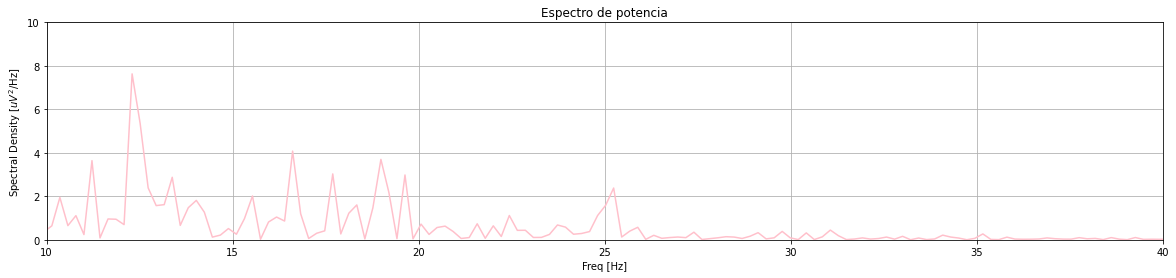

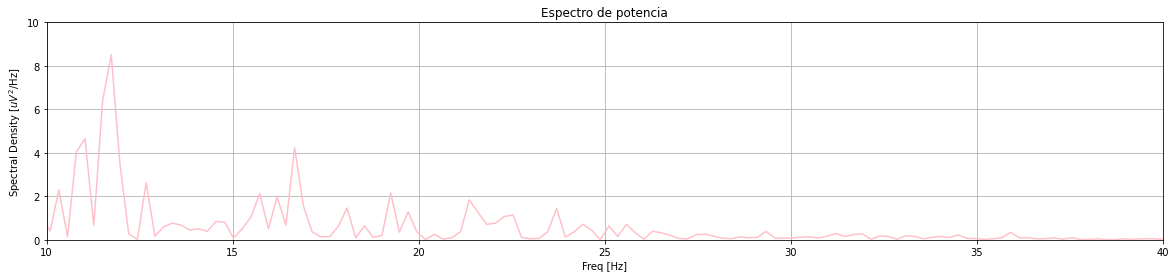

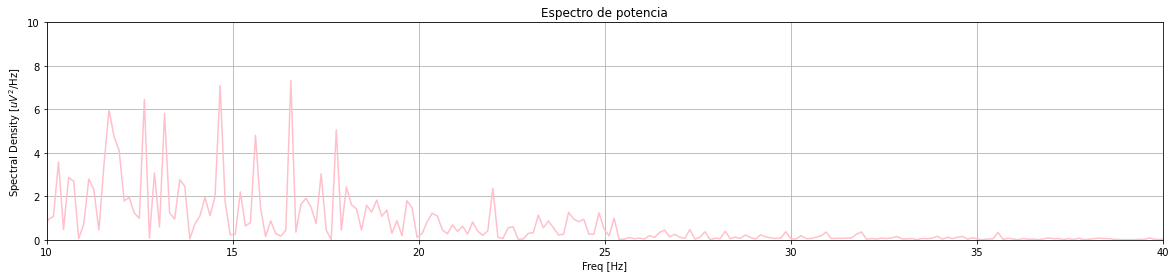

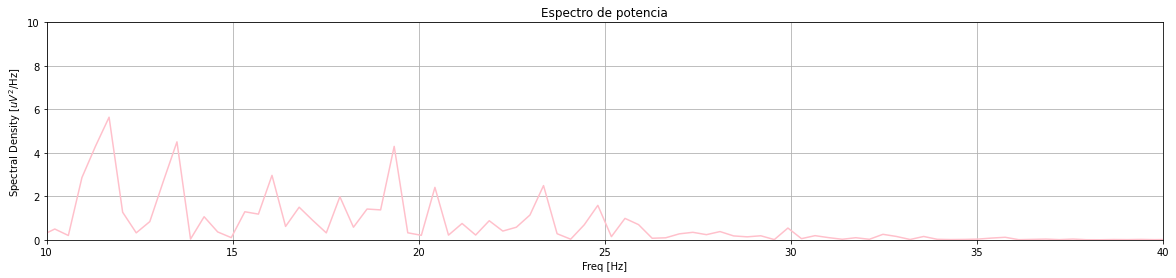

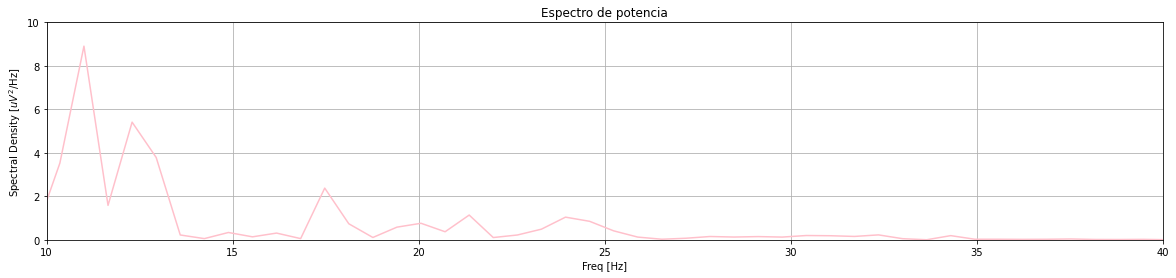

In [61]:
#intérvalos del estado 99
for intervalos in int_s99.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  transformadas(intervalos, 0.005)
  plot_spectral(intervalos, 0.005, freq_lim=(10, 40), amp_lim=(0,10), color= 'pink')
  

Para cada estado, correspondientes al canal 2, del paciente AA, sesión 2, existen los siguientes intervalos:


*   Estado 1: 9 intervalos.
*   Estado 2: 10 intervalos.
*   Estado 99: 20 intervalos.


In [62]:
#frecuencias del estado 1 
for intervalos in int_s1.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  print(intervalos[(intervalos > 0) & (intervalos < 100)].head(2))

38.938411    12.45
35.945424    12.54
dtype: float64
22.819252    24.99
5.244044     10.83
dtype: float64
48.371220    12.52
9.684942     25.04
dtype: float64
49.156842    12.45
28.237162    12.54
dtype: float64
20.479103    25.00
10.458627    12.45
dtype: float64
44.028361    25.00
6.766789     12.36
dtype: float64
11.720254    25.05
6.028386     12.48
dtype: float64
5.486670    14.01
4.961053    12.96
dtype: float64
27.244617    12.47
21.841078    12.57
dtype: float64


In [63]:
#frecuencias del estado 2 
for intervalos in int_s2.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  print(intervalos[(intervalos > 0) & (intervalos < 100)].head(2))

103.618846    16.64
39.382047     16.74
dtype: float64
13.326250    16.65
7.349621     15.89
dtype: float64
13.386154    13.02
9.436220     16.91
dtype: float64
9.430882    16.80
8.119402    16.71
dtype: float64
20.345153    16.65
7.868383     16.56
dtype: float64
10.674092    16.74
5.494795     13.03
dtype: float64
27.025733    16.67
7.708388     16.76
dtype: float64
17.668211    16.63
10.960500    16.73
dtype: float64
25.150473    16.67
9.126223     16.00
dtype: float64
18.093060    16.66
7.474438     12.28
dtype: float64


In [64]:
#frecuencias del estado 99 
for intervalos in int_s99.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  print(intervalos[(intervalos > 0) & (intervalos < 100)].head(2))

20.705722    11.44
20.077690    11.30
dtype: float64
5.409377    16.70
3.356287    13.41
dtype: float64
4.774217    11.81
4.665847    12.06
dtype: float64
5.057203    15.74
5.050867    13.53
dtype: float64
6.155306    12.89
3.194871    12.14
dtype: float64
5.511417    16.46
4.554022    11.08
dtype: float64
5.946500    10.96
4.776823    12.67
dtype: float64
3.662531    15.02
3.314598    19.01
dtype: float64
5.579150    11.95
4.738793    10.99
dtype: float64
31.757443    10.90
25.420605    10.45
dtype: float64
4.529304    16.14
2.633434    12.47
dtype: float64
5.840695    12.93
2.712814    15.14
dtype: float64
10.571699    14.88
5.441640     20.26
dtype: float64
9.521564    12.52
6.303998    11.66
dtype: float64
3.497943    18.29
2.082253    20.94
dtype: float64
7.631103    12.30
5.357473    12.51
dtype: float64
8.512773    11.74
6.358226    11.50
dtype: float64
7.335316    16.56
7.095817    14.66
dtype: float64
5.637761    11.68
4.504538    13.50
dtype: float64
8.905695    11.0
5.410096

*    Estado1: Para cada uno de los intervalos correspondientes al estado 1, la frecuencia máxima oscila al rededor de 12.5Hz (12,45-12,52), y 25.0Hz, correspondiente al armónico de la frecuencia de 12.5Hz. 
*    Estado2: Para cada uno de los intervalos correspondientes al estado 2 la frecuencia máxima oscila al rededor de 16.60Hz (16.63-16.80Hz), exceptuando un intérvalo que contiene una frecuencia máxima de 13hz. 
*    Estado99: Para cada uno de los intervalos correspondientes al estado 99 la frecuencia máxima oscila alrededor de un rango variable (10.96-18.29Hz), es decir involucrando las frecuencias de interés, pero todas ellas a una potencia menor que las correspondientes a las de los estados anteriores, por lo que se puede distinguir perfectamente de dichos estados.



####Análisis estadístico

Para este análisis se consideró las frecuencias con mayor presencia de cada intérvalo de todos los canales para tener la cantidad de datos necesarios para realizar el análisis estadístico.

In [65]:
#frecuencias del estado 1 
sl1_1 = s1.sub_label.unique()
channels = ['ch0', 'ch1','ch2', 'ch3']

int_s1_x_canal = {}
for channel in channels:
    for i1 in sl1_1:
        int_s1_x_canal[i1 + ' ' + channel] = s1[(s1['sub_label'] == i1)][channel]

In [66]:
#frecuencias del estado 2
sl2_1 = s2.sub_label.unique()
channels = ['ch0', 'ch1','ch2', 'ch3']

int_s2_x_canal = {}
for channel in channels:
    for i2 in sl2_1:
        int_s2_x_canal[i2 + ' ' + channel] = s2[(s2['sub_label'] == i2)][channel]

In [67]:
#frecuencias del estado 99
sl99_1 = s99.sub_label.unique()
channels = ['ch0', 'ch1','ch2', 'ch3']

int_s99_x_canal = {}
for channel in channels:
    for i99 in sl99_1:
        int_s99_x_canal[i99 + ' ' + channel] = s99[(s99['sub_label'] == i99)][channel]

In [68]:
#frecuencias del estado 1 
ii= list()
for intervalos in int_s1_x_canal.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  iii= (intervalos[(intervalos > 0) & (intervalos < 20)].head(1))
  ii.append(float(iii.values))
print(ii)

[12.54, 10.83, 12.52, 12.45, 12.36, 11.69, 13.43, 12.58, 11.61, 12.45, 11.31, 12.52, 12.45, 12.07, 12.55, 11.62, 12.67, 11.61, 12.45, 10.83, 12.52, 12.45, 12.45, 12.36, 12.48, 14.01, 12.47, 12.45, 10.83, 12.52, 12.45, 12.45, 12.55, 12.48, 14.01, 12.57]


In [69]:
i=pd.Series(ii)

count    36.00
mean     12.32
std       0.70
min      10.83
25%      12.29
50%      12.45
75%      12.52
max      14.01
dtype: float64 median= 12.45


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del estímulo 1')

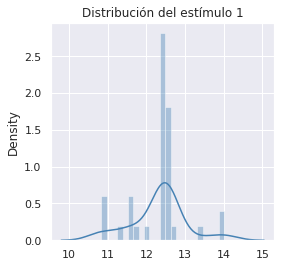

In [70]:
print(i.describe().round(2), 'median=', i.median())
seaborn.set(rc={"figure.figsize": (4, 4)})
seaborn.distplot(i.values, color='steelblue')
plt.title('Distribución del estímulo 1')

In [71]:
#frecuencias del estado 1, primer armónico
zz= list()
for intervalos in int_s1_x_canal.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  zzz= (intervalos[(intervalos > 20) & (intervalos < 40)].head(1))
  zz.append(float(zzz.values))
print(zz)

[22.9, 23.94, 22.95, 20.24, 20.53, 20.53, 30.29, 20.01, 21.04, 24.99, 24.99, 24.18, 25.08, 25.0, 25.0, 20.67, 21.44, 25.04, 24.99, 24.99, 25.04, 24.99, 25.0, 25.0, 25.05, 24.96, 25.04, 24.99, 24.99, 25.04, 24.99, 25.0, 25.0, 25.05, 24.87, 25.04]


In [72]:
z=pd.Series(zz)

count    36.00
mean     24.13
std       2.04
min      20.01
25%      23.69
50%      24.99
75%      25.01
max      30.29
dtype: float64 median= 24.99


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del estímulo 1, primer armónico')

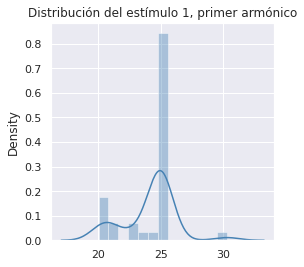

In [73]:
print(z.describe().round(2), 'median=', z.median())
seaborn.set(rc={"figure.figsize": (4, 4)})
seaborn.distplot(z.values, color='steelblue')
plt.title('Distribución del estímulo 1, primer armónico')

In [74]:
#frecuencias del estado 2 
nn= list()
for intervalos in int_s2_x_canal.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  nnn= (intervalos[(intervalos > 11) & (intervalos < 20)].head(1))
  nn.append(float(nnn.values))
print(nn)

[16.64, 16.65, 16.63, 13.86, 16.65, 13.98, 16.67, 16.63, 16.67, 16.66, 16.64, 16.65, 11.59, 11.87, 11.23, 16.74, 12.0, 11.12, 16.67, 14.95, 16.64, 16.65, 13.02, 16.8, 16.65, 16.74, 16.67, 16.63, 16.67, 16.66, 16.64, 15.89, 13.02, 12.81, 11.99, 16.74, 16.67, 16.63, 16.67, 16.66]


In [75]:
n=pd.Series(nn)

count    40.00
mean     15.43
std       1.97
min      11.12
25%      13.95
50%      16.64
75%      16.67
max      16.80
dtype: float64 median= 16.64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del estímulo 2')

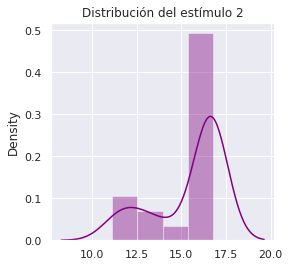

In [76]:
print(n.describe().round(2), 'median=', n.median())
seaborn.set(rc={"figure.figsize": (4, 4)})
seaborn.distplot(n.values, color='purple')
plt.title('Distribución del estímulo 2')

In [77]:
#frecuencias del estado 99
xx= list()
for intervalos in int_s99_x_canal.values():
  intervalos.values.T
  intervalos= sgn.filtfilt(b, a, intervalos)
  intervalos= sgn.filtfilt(c, d, intervalos)
  intervalos= transformadas_serie(intervalos, 0.005)
  intervalos= intervalos.sort_index(ascending= False).round(2)
  xxx= (intervalos[(intervalos > 11) & (intervalos < 20)].head(1))
  xx.append(float(xxx.values))
print(xx)

[11.3, 11.21, 11.06, 14.02, 12.14, 16.15, 11.3, 15.02, 14.86, 11.83, 17.36, 11.04, 12.62, 12.52, 13.72, 18.12, 13.85, 13.17, 12.77, 12.3, 11.44, 12.97, 11.81, 11.56, 12.89, 11.54, 11.99, 11.27, 11.95, 11.25, 16.14, 12.93, 14.88, 12.52, 18.29, 12.3, 11.74, 11.68, 11.68, 16.18, 11.44, 16.7, 11.81, 15.74, 12.89, 16.46, 12.67, 15.02, 11.95, 11.25, 16.14, 12.93, 14.88, 12.52, 18.29, 12.3, 11.74, 16.56, 11.68, 12.3, 17.66, 12.97, 12.06, 14.64, 12.89, 13.38, 12.67, 15.02, 19.71, 11.28, 16.14, 12.93, 14.88, 12.52, 12.52, 12.51, 11.5, 16.56, 11.68, 12.94]


In [78]:
x=pd.Series(xx)

count    80.00
mean     13.44
std       2.12
min      11.04
25%      11.79
50%      12.67
75%      14.88
max      19.71
dtype: float64 median= 12.67


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribución del estímulo 99')

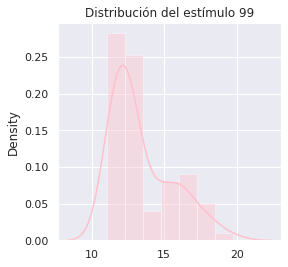

In [79]:
print(x.describe().round(2), 'median=', x.median())
seaborn.set(rc={"figure.figsize": (4, 4)})
seaborn.distplot(x.values, color='pink')
plt.title('Distribución del estímulo 99')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribución de todos los estímulos')

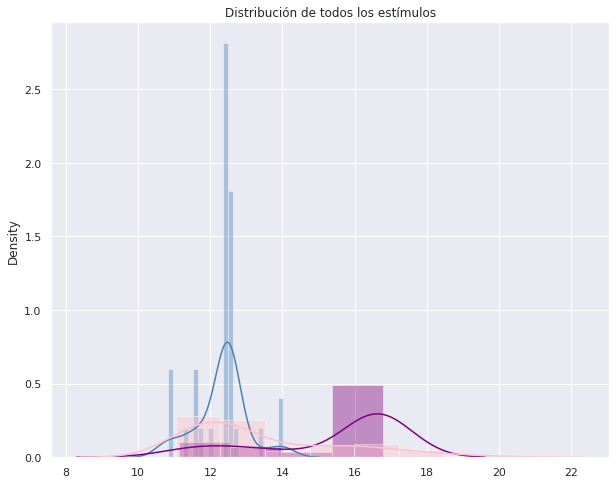

In [80]:
fig, ax = plt.subplots(figsize=(10, 8))
seaborn.set(rc={"figure.figsize": (4, 4)})
seaborn.distplot(i.values, color= 'steelblue')
seaborn.distplot(n.values, color= 'purple')
seaborn.distplot(x.values, color= 'pink')
plt.title('Distribución de todos los estímulos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Distribución de todos los estímulos, incluído el primer armónico del estímulo 1')

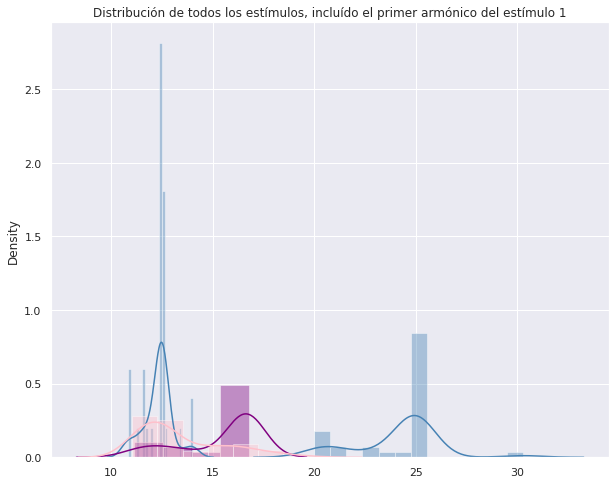

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
seaborn.set(rc={"figure.figsize": (4, 4)})
seaborn.distplot(i.values, color= 'steelblue')
seaborn.distplot(z.values, color= 'steelblue')
seaborn.distplot(n.values, color= 'purple')
seaborn.distplot(x.values, color= 'pink')
plt.title('Distribución de todos los estímulos, incluído el primer armónico del estímulo 1')

####Diferencia estadística

In [82]:
stats.ttest_ind(i, n)

Ttest_indResult(statistic=-8.950245499569903, pvalue=2.065183958283648e-13)

In [83]:
stats.ttest_ind(x, n)

Ttest_indResult(statistic=-4.9689898576519465, pvalue=2.300443298041385e-06)

In [84]:
stats.ttest_ind(i, x)

Ttest_indResult(statistic=-3.0784896208249504, pvalue=0.002606694345127086)

Al relizar el test de diferencia de medinas entre los tres estados, se puede determinar que como el p-valor es muy inferior a 0.005, hay suficiente evidencia para decir que existe una diferencia estadísticamente significativa, entre los valores centrales de frecuencias para los estados existentes.


In [85]:
df_indep = pd.DataFrame(data=[i, n, x],index=['Estimulo1', 'Estimulo2', 'Estimulo99']).T

In [86]:
plot = df_indep.melt(var_name='Estimulo', value_name='Value')

In [87]:
import plotly.express as px

In [88]:
px.box(plot, y='Value', color='Estimulo', color_discrete_sequence=['steelblue','purple','pink'])

####Independencia de variables

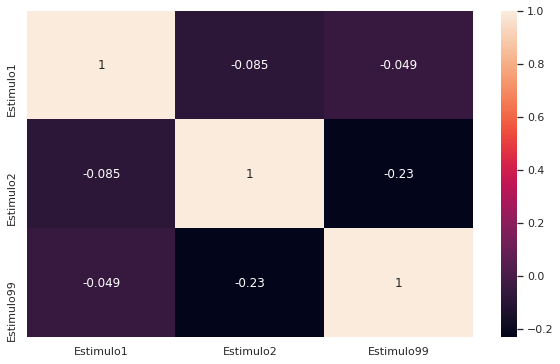

In [89]:
fig= plt.figure(figsize=(10, 6))
cplot = df_indep.iloc[:, 0:3]
correlation_mat = cplot.corr()
seaborn.heatmap(correlation_mat, annot = True)
plt.show()

Se puede determinar que las variables estado registrado de la señal y la frecuencia mayoritaria presente en el registro son variables independientes, ya que no existe una correlación entre ellas.

###Espectrograma

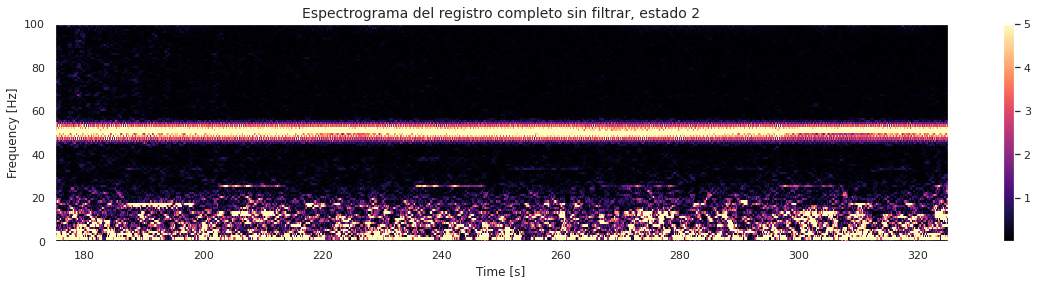

In [90]:
#espectograma del registro completo
Fs = 1 / 0.005              
interval = int(Fs)        
overlap = int((Fs * 0.95)) 
figure(figsize=(20, 4))                     
f, t, Sxx = spectrogram(
    dfAA['ch2'],                  
    fs=Fs,               
    nperseg= interval,
    noverlap= overlap)     
pcolormesh(t, f, Sxx, vmax=5, shading= 'gouroad', cmap='magma')
colorbar()               
ylim([0, 100])   
xlim([175, 325])          
xlabel('Time [s]')        
ylabel('Frequency [Hz]')
plt.title(f'Espectrograma del registro completo sin filtrar, estado 2', fontsize=14)
show()

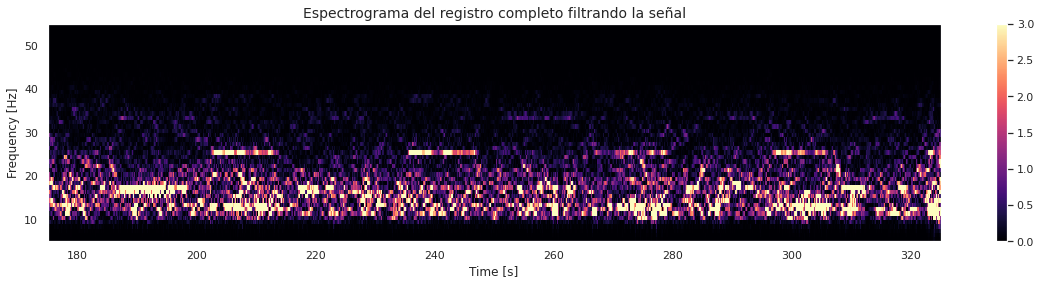

In [91]:
#espectograma del registro filtrado
Fs = 1 / 0.005              
interval = int(Fs)        
overlap = int((Fs * 0.95)) 
figure(figsize=(20, 4))                   
f, t, sxx = spectrogram(
    dfAAf,                  
    fs=Fs,               
    nperseg= interval,
    noverlap= overlap)     
pcolormesh(t, f, sxx, vmax=3, cmap='magma')
colorbar()               
plt.title(f'Espectrograma del registro completo filtrando la señal', fontsize=14)
ylim([5, 55])
xlim([175, 325])              
xlabel('Time [s]')        
ylabel('Frequency [Hz]')

show()

El espectrograma es el resultado de calcular el espectro de una señal por ventanas de tiempo de la misma. Resulta una gráfica tridimensional que representa la energía del contenido frecuencial de la señal según va variando esta a lo largo del tiempo. La idea del espectrograma es dividir la serie de tiempo en intervalos de datos más pequeños y luego calcular el espectro en cada intervalo. Estos intervalos pueden ser bastante pequeños e incluso superponerse. El resultado es el espectro en función de la frecuencia y el tiempo.

Si comparamos los espectrogramas de la señal filtrada con respecto a la señal sin filtrar se puede observar que en el primero predomina la intensidad de la frecuencia a 50Hz, la cual desaparece al filtrar la señal, al igual que la señal ruidosa entre 0 y 10 Hz. Además en el espectrograma con la señal filtrada se pueden distinguir las frecuencias en las que predomina cada estado y sus armónicos. 

#Nivel Paciente - multi canal 

Para este análisis se consideró al paciente AA, incluyendo todas sus sesiones.

In [92]:
AA= df[df['subject'] == 'AA']

In [93]:
sig_np = AA['ch2'].values.T
sig_notch = sgn.filtfilt(b, a, sig_np)
AAf= sgn.filtfilt(c, d, sig_notch)

In [94]:
def espectogramas (signal):
  Fs = 1 / 0.005              
  interval = int(Fs)        
  overlap = int((Fs * 0.95)) 

  figure(figsize=(20, 4))                  
  f, t, SXX = spectrogram(
      signal,                  
      fs=Fs,               
      nperseg= interval,
      noverlap= overlap)     
  pcolormesh(t, f, SXX, vmax=3, cmap='magma')
  colorbar()               
  ylim([5, 30])
  xlim([50, 225])             
  xlabel('Time [s]')        
  ylabel('Frequency [Hz]')
  show()

In [95]:
sig_np_0 = AA['ch0'].values.T
sig_notch_0 = sgn.filtfilt(b, a, sig_np_0)
dfAAf0= sgn.filtfilt(c, d, sig_notch_0)

sig_np_1 = AA['ch1'].values.T
sig_notch_1 = sgn.filtfilt(b, a, sig_np_1)
dfAAf1= sgn.filtfilt(c, d, sig_notch_1)

sig_np_2 = AA['ch2'].values.T
sig_notch_2 = sgn.filtfilt(b, a, sig_np_2)
dfAAf2= sgn.filtfilt(c, d, sig_notch_2)

sig_np_3 = AA['ch3'].values.T
sig_notch_3 = sgn.filtfilt(b, a, sig_np_3)
dfAAf3= sgn.filtfilt(c, d, sig_notch_3)


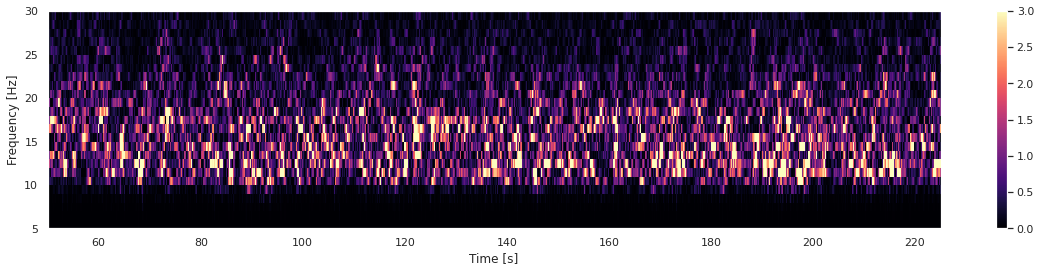

In [96]:
espectogramas(dfAAf0)
# espectogramas(AA['ch0'])

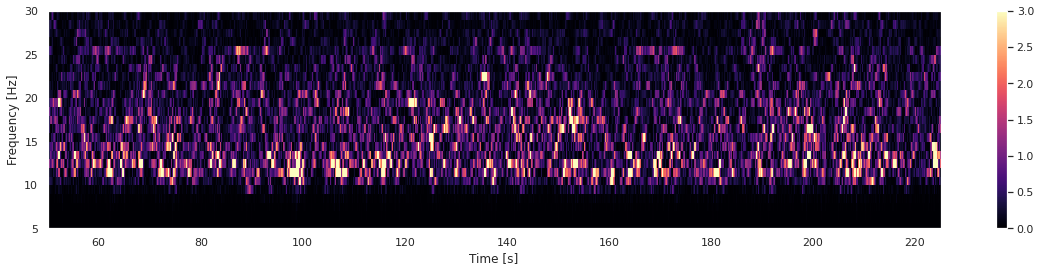

In [97]:
espectogramas(dfAAf1)
# espectogramas(AA['ch1'])

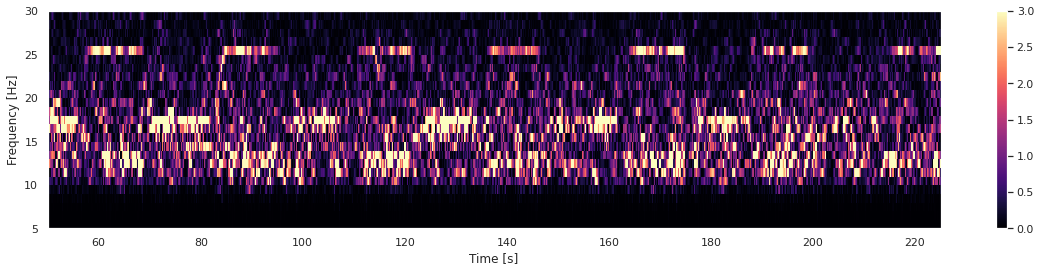

In [98]:
espectogramas(dfAAf2)
# espectogramas(AA['ch2'])

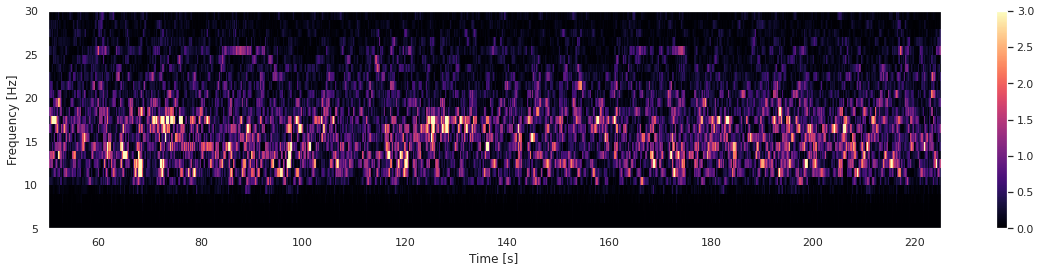

In [99]:
espectogramas(dfAAf3)
# espectogramas(AA['ch3'])

En los gráficos anteriores se puede observar que no existe una clara correlación de la señal respecto a los distintos canales, ya que sus espectogramas dan imagenes diferentes, algunos con espectogramas mas confusos y otros con espectogramas mas concluyentes, siendo el espectograma del canal 2 (ch2), el que proporciona una señal más clara y definida, diferenciandose claramente las frecuencias predominantes entre los diferentes estados y sus armónicos. Los espectogramas de los otros canales proporcionan imagenes de señales más confusas, por lo que se podría seleccionar el canal 2, ya que es el que proporciona los datos mas relevantes, y algún otro canal para tener un complemento, por ejemplo el canal 1 (ch1), por si ocurriera algo con el otro canal.

#Nivel Multi-Paciente


In [100]:
AA= df[(df['subject'] == 'AA')]
s1AA= AA[(AA['label'] == 1)]
s2AA= AA[(AA['label'] == 2)]
s99AA= AA[(AA['label'] == 99)]

In [101]:
JA= df[(df['subject'] == 'JA')]
s1JA= JA[(JA['label'] == 1)]
s2JA= JA[(JA['label'] == 2)]
s99JA= JA[(JA['label'] == 99)]

In [102]:
HA= df[(df['subject'] == 'HA')]
s1HA= HA[(HA['label'] == 1)]
s2HA= HA[(HA['label'] == 2)]
s99HA= HA[(HA['label'] == 99)]

In [103]:
MA= df[(df['subject'] == 'MA')]
s1MA= MA[(MA['label'] == 1)]
s2MA= MA[(MA['label'] == 2)]
s99MA= MA[(MA['label'] == 99)]

In [104]:
pacientes= [AA['ch2'], JA['ch2'], HA['ch2'], MA['ch2']]
pacientes_s1= [s1AA['ch2'], s1JA['ch2'], s1HA['ch2'], s1MA['ch2']]
pacientes_s2= [s2AA['ch2'], s2JA['ch2'], s2HA['ch2'], s2MA['ch2']]
pacientes_s99= [s99AA['ch2'], s99JA['ch2'], s99HA['ch2'], s99MA['ch2']]

In [105]:
for paciente in pacientes_s1:
  print(len(paciente))

58868
31536
18936
12630


In [106]:
for paciente in pacientes_s2:
  print(len(paciente))

63080
33631
21029
12627


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part



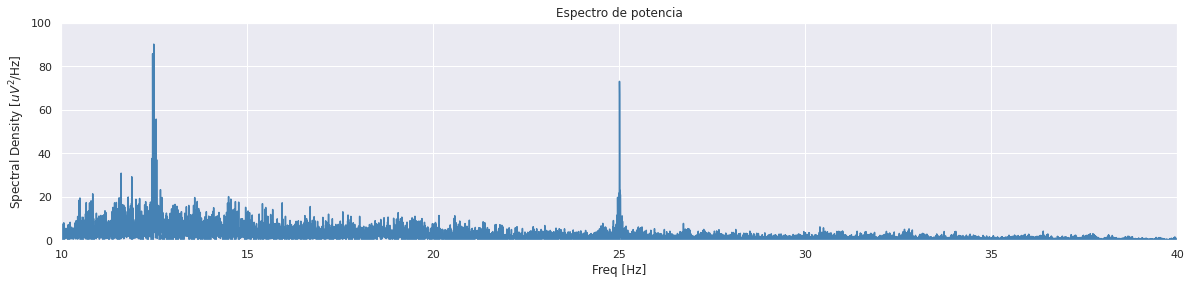

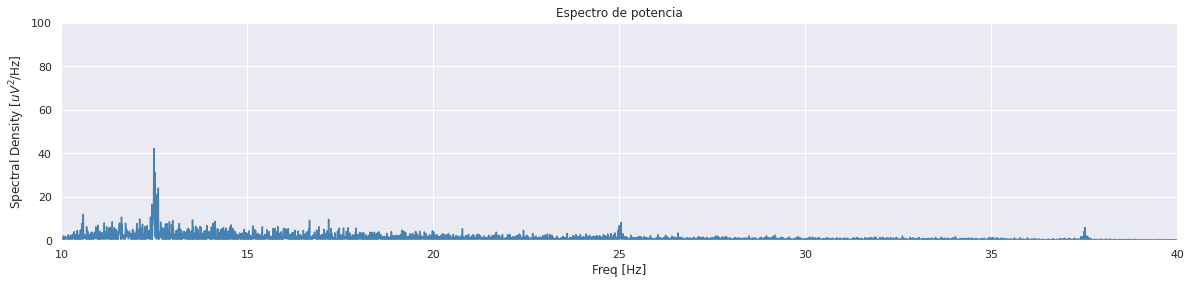

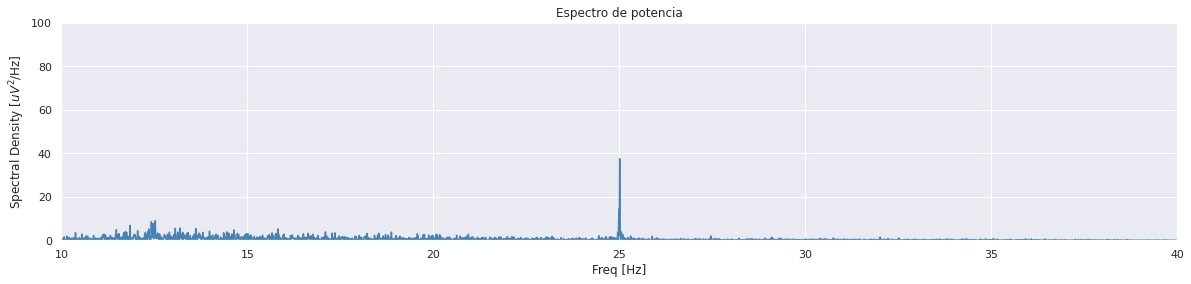

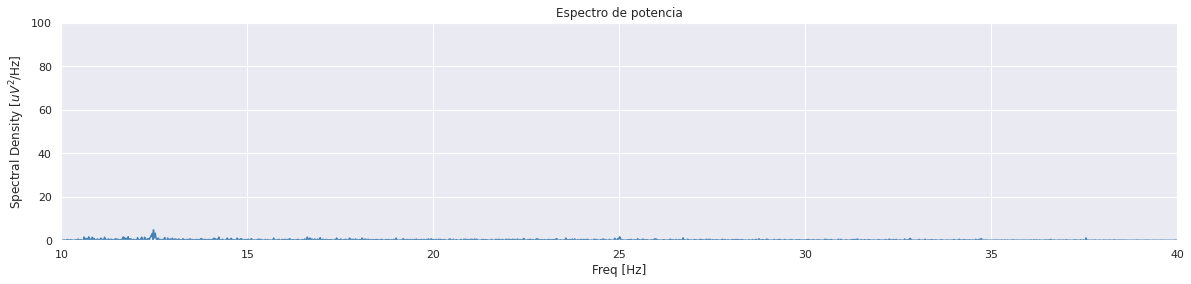

In [107]:
# espectros de potencia del canal 2, estimulo 1, de todos los pacientes
for paciente in pacientes_s1:
  paciente.values.T
  paciente= sgn.filtfilt(b, a, paciente)
  paciente= sgn.filtfilt(c, d, paciente)
  transformadas(paciente, 0.005)
  plot_spectral(paciente, 0.005, freq_lim=(10, 40), amp_lim=(0,100), color= 'steelblue')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning:

Casting complex values to real discards the imaginary part



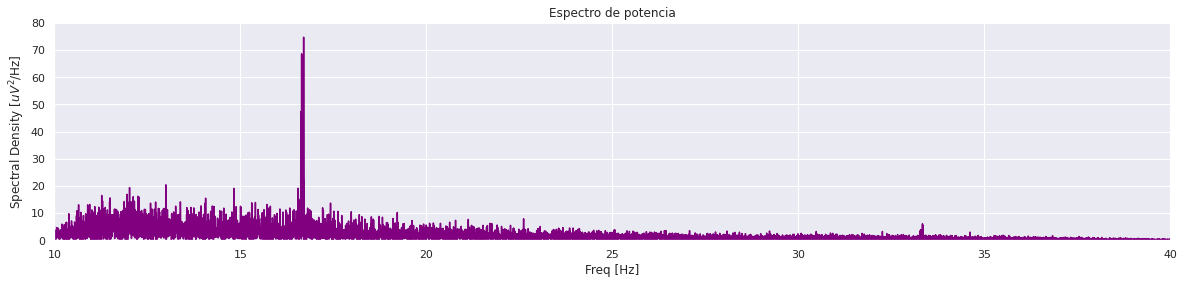

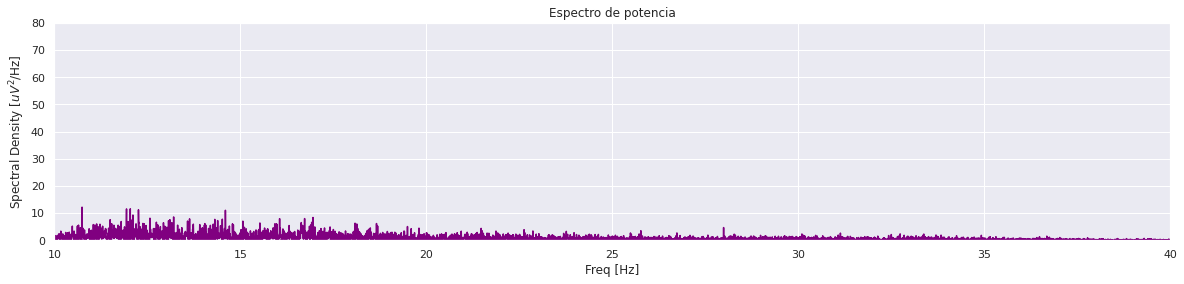

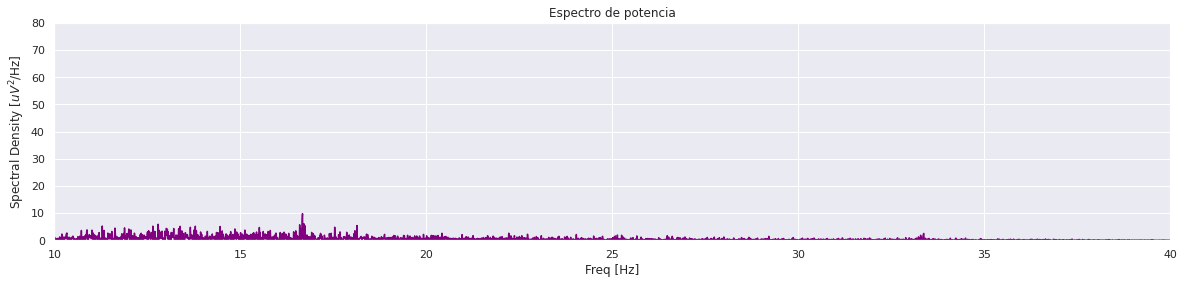

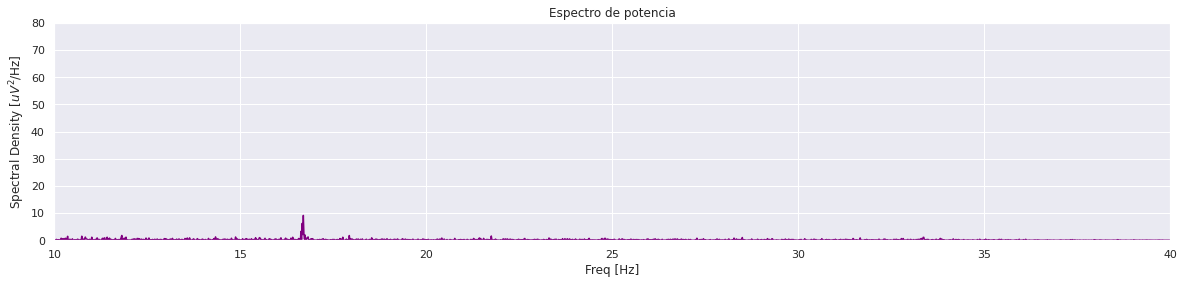

In [108]:
# espectros de potencia del canal 2, estimulo 2, de todos los pacientes
for paciente in pacientes_s2:
  paciente.values.T
  paciente= sgn.filtfilt(b, a, paciente)
  paciente= sgn.filtfilt(c, d, paciente)
  transformadas(paciente, 0.005)
  plot_spectral(paciente, 0.005, freq_lim=(10, 40), amp_lim=(0,80), color= 'purple')

In [109]:
#frecuencias del estado 1 de todos los pacientes
for paciente in pacientes_s1:
  paciente.values.T
  paciente= sgn.filtfilt(b, a, paciente)
  paciente= sgn.filtfilt(c, d, paciente)
  paciente= transformadas_serie(paciente, 0.005)
  paciente= paciente.sort_index(ascending= False).round(2)
  print(paciente[(paciente > 10) & (paciente < 40)].head(2))

90.208972    12.49
85.816492    12.45
dtype: float64
42.153141    12.49
31.228510    12.52
dtype: float64
37.486556    25.01
14.340277    24.99
dtype: float64
4.795668    12.48
3.282960    12.53
dtype: float64


In [110]:
#frecuencias del estado 1 de todos los pacientes
for paciente in pacientes_s2:
  paciente.values.T
  paciente= sgn.filtfilt(b, a, paciente)
  paciente= sgn.filtfilt(c, d, paciente)
  paciente= transformadas_serie(paciente, 0.005)
  paciente= paciente.sort_index(ascending= False).round(2)
  print(paciente[(paciente > 11) & (paciente < 40)].head(2))

74.725042    16.70
68.601394    16.65
dtype: float64
11.585976    12.04
11.545717    11.94
dtype: float64
9.803354    16.67
7.563664    16.66
dtype: float64
9.158967    16.69
6.202322    16.66
dtype: float64


Como se puede observar en los espectros de potencia del canal 2 (ch2), de los distintos pacientes, diferenciados por estímulos, se puede observar que en todos los casos se encuentran los picos de frecuencias de interés, lo que también se puede observar es que mientras mayor cantidad de registros posea, mayor es la potencia de los picos de frcuencia de interés, y mayor es la diferenciacion con respecto al resto, habiendo una clara diferencia entre los pacientes.

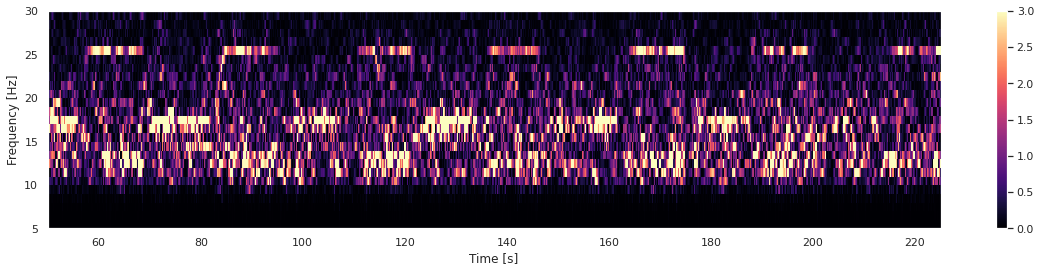

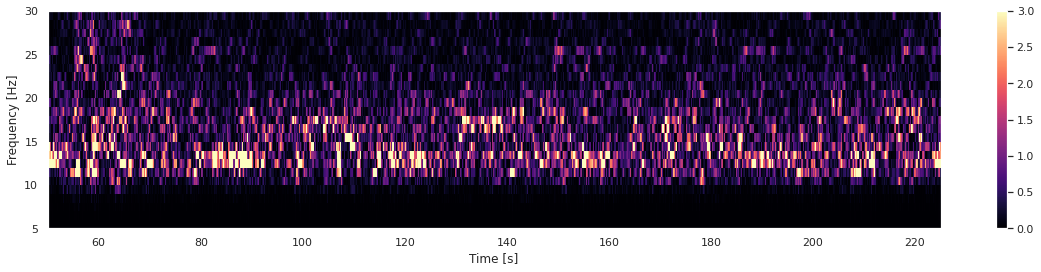

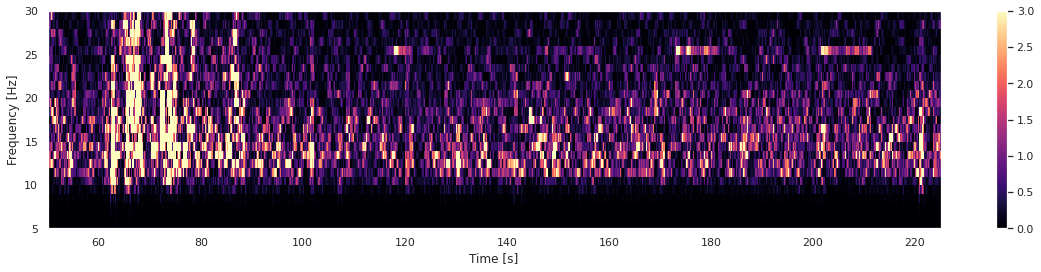

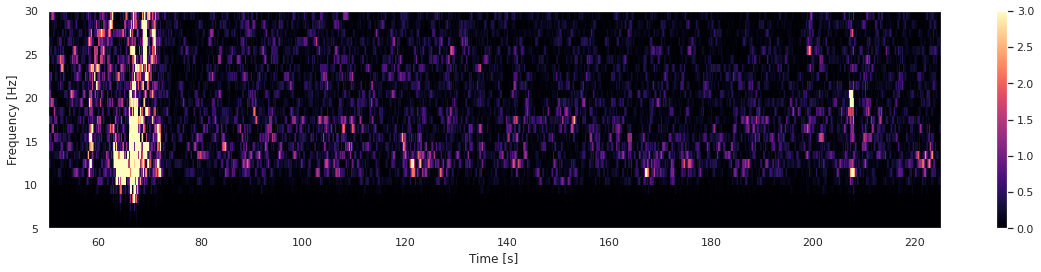

In [111]:
for paciente in pacientes:
  paciente.values.T
  paciente= sgn.filtfilt(b, a, paciente)
  paciente= sgn.filtfilt(c, d, paciente)
  espectogramas(paciente)


Con los espectogramas se puede visualizar que si bien los espectogramas muestran que existe una relación entre el estado y la frecuencia, esta diferenciación de la señal es dependiente de la cantidad de regístros que se posean, ya que a medida que mayor cantidad de registros, mayor es la diferenciacion de la señal con respecto al estímulo recibido.

#Comparando con el Trabajo Práctico anterior

Cambia la complejidad del análisis de acuerdo a si se trabaja en un dominio o en otro, debido a que para la evaluación del dominio de frecuencia se requiere de conocimiento de dominio de los datos, ya que para su análisis se utilizan herramientas específicas que requieren de un conocimiento previo para ejecutar el análisis, pero esta es la forma correcta de analizar los datos obtenidos, ya que es el tipo de análisis que proporciona la información relevante al objeto de estudio. Por otra parte, el estudio del dominio del tiempo es más complejo en el sentido de que no se obtienen conclusiones que permita una diferenciación entre los estados, y además presenta muchas particularidades de cada sujeto, por lo que no se pueden obtener resultados generalizables, a diferencia de lo que ocurre en el estudio del dominio de la frecuencia, donde se llega en todos los casos a las mismas conclusiones. Para implementar un modelo de clasificación supervisada se requiere realizar el análisis por medio del dominio de frecuencia ya que este tipo de análisis brinda la información necesaria para poder clasificar un estímulo en las distintas categorías, y esto no lo brinda el análisis temporal, ya que el estímulo que esté recibiendo el paciente se relaciona con las frecuencias de las señales que se reciben, y no con las variaciones de voltaje a lo largo del tiempo, ya que en el trabajo práctico anterior se determinó que no existe una correlación entre los valores de amplitud de los registros y el estado. El análisis en el dominio del tiempo no brinda información que permita una diferenciación evidente y clara de los estados, pero el análisis en el dominio de frecuencia sí.
